## Final Project Submission

Please fill out:
* Student name: Vivienne DiFrancesco
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


# INTRODUCTION

# OBTAIN

In [205]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linreg = LinearRegression()

In [199]:
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [200]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [201]:
df.set_index('id', inplace=True, verify_integrity=True)

ValueError: Index has duplicate keys: Int64Index([6021501535, 4139480200, 7520000520, 3969300030, 2231500030,
            8820903380,  726049190, 8682262400, 9834200885, 8062900070,
            ...
            7856400300, 1901600090, 6021500970,  643300040, 8648900110,
            7853400250, 2724049222, 8564860270, 6300000226, 7853420110],
           dtype='int64', name='id', length=176)

In [5]:
houses_resold = df[df.duplicated(keep=False, subset=['id'])]
houses_resold.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.000,3,1.500,1580,5000,1.000,0.000,0.000,3,8,1290,290.0,1939,0.000,98117,47.687,-122.386,1570,4500
94,6021501535,12/23/2014,700000.000,3,1.500,1580,5000,1.000,0.000,0.000,3,8,1290,290.0,1939,0.000,98117,47.687,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.000,4,3.250,4290,12103,1.000,0.000,3.000,3,11,2690,1600.0,1997,0.000,98006,47.550,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.000,4,3.250,4290,12103,1.000,0.000,3.000,3,11,2690,1600.0,1997,0.000,98006,47.550,-122.102,3860,11244
324,7520000520,9/5/2014,232000.000,2,1.000,1240,12092,1.000,nan,0.000,3,6,960,280.0,1922,1984.000,98146,47.496,-122.352,1820,7460


In [6]:
df.set_index('id', inplace=True)

In [7]:
df.head(20)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
7237550310,5/12/2014,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,3,11,3890,1530.0,2001,0.000,98053,47.656,-122.005,4760,101930
1321400060,6/27/2014,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,3,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
2008000270,1/15/2015,291850.000,3,1.500,1060,9711,1.000,0.000,nan,3,7,1060,0.0,1963,0.000,98198,47.410,-122.315,1650,9711
2414600126,4/15/2015,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,3,7,1050,730.0,1960,0.000,98146,47.512,-122.337,1780,8113


In [8]:
df.shape

(21597, 20)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


# SCRUB

## Price column

In [10]:
df.price = df.price.astype('int64')

In [11]:
df.price.describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

In [12]:
df.price.value_counts()[:10]

450000    172
350000    172
550000    159
500000    152
425000    150
325000    148
400000    145
375000    138
300000    133
525000    131
Name: price, dtype: int64

## NA values

In [13]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
df.waterfront.fillna(0, inplace=True)

In [15]:
df.waterfront.value_counts()

0.000    21451
1.000      146
Name: waterfront, dtype: int64

In [16]:
df.waterfront = df.waterfront.astype('int64')

In [17]:
df.view.fillna(0, inplace=True)

In [18]:
df.view.value_counts()

0.000    19485
2.000      957
3.000      508
1.000      330
4.000      317
Name: view, dtype: int64

In [19]:
df.yr_renovated.fillna(0, inplace=True)

In [20]:
df.yr_renovated = df.yr_renovated.astype('int64')

In [21]:
df.yr_renovated.value_counts()[:10]

0       20853
2014       73
2003       31
2013       31
2007       30
2005       29
2000       29
2004       22
1990       22
2009       21
Name: yr_renovated, dtype: int64

In [22]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Checking for strange values in other columns

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(13), object(2)
memory usage: 3.5+ MB


In [24]:
df.date.value_counts()[:10]

6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
3/25/2015    123
7/9/2014     121
4/14/2015    121
4/28/2015    121
4/22/2015    121
Name: date, dtype: int64

In [25]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [26]:
df.bathrooms.value_counts()

2.500    5377
1.000    3851
1.750    3048
2.250    2047
2.000    1930
1.500    1445
2.750    1185
3.000     753
3.500     731
3.250     589
3.750     155
4.000     136
4.500     100
4.250      79
0.750      71
4.750      23
5.000      21
5.250      13
5.500      10
1.250       9
6.000       6
5.750       4
0.500       4
8.000       2
6.250       2
6.750       2
6.500       2
7.500       1
7.750       1
Name: bathrooms, dtype: int64

In [27]:
df.sqft_living.value_counts()[:10]

1300    138
1400    135
1440    133
1660    129
1010    129
1800    129
1820    128
1480    125
1720    125
1540    124
Name: sqft_living, dtype: int64

In [28]:
df.sqft_lot.value_counts()[:10]

5000    358
6000    290
4000    251
7200    220
7500    119
4800    119
4500    114
8400    111
9600    109
3600    103
Name: sqft_lot, dtype: int64

In [29]:
df.floors.value_counts()

1.000    10673
2.000     8235
1.500     1910
3.000      611
2.500      161
3.500        7
Name: floors, dtype: int64

In [30]:
df.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [31]:
df.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [32]:
df.sqft_above.value_counts()[:10]

1300    212
1010    210
1200    206
1220    192
1140    184
1400    180
1060    178
1180    177
1340    176
1250    174
Name: sqft_above, dtype: int64

In [33]:
df.sqft_basement.value_counts()[:10]

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
Name: sqft_basement, dtype: int64

In [34]:
df.sqft_basement = df.sqft_basement.map(lambda x: int(float(x.replace('?', '0'))))

In [35]:
df.sqft_basement = df.sqft_basement.astype('int64')

In [36]:
df.sqft_basement.value_counts()[:10]

0       13280
600       217
500       209
700       208
800       201
400       184
1000      148
900       142
300       142
200       105
Name: sqft_basement, dtype: int64

In [37]:
df.yr_built.value_counts()[:10]

2014    559
2006    453
2005    450
2004    433
2003    420
2007    417
1977    417
1978    387
1968    381
2008    367
Name: yr_built, dtype: int64

In [38]:
df.zipcode.value_counts()[:10]

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
Name: zipcode, dtype: int64

In [39]:
df.lat.value_counts()

47.662    17
47.549    17
47.532    17
47.685    17
47.671    16
47.689    16
47.696    16
47.665    15
47.690    15
47.686    15
47.684    15
47.540    15
47.552    14
47.685    14
47.543    14
47.532    14
47.540    14
47.673    14
47.544    14
47.684    14
47.673    14
47.708    14
47.553    14
47.665    14
47.691    14
47.637    14
47.534    14
47.653    14
47.540    14
47.682    14
47.531    13
47.566    13
47.675    13
47.686    13
47.692    13
47.688    13
47.697    13
47.550    13
47.697    13
47.676    13
47.637    13
47.629    13
47.680    13
47.668    13
47.698    13
47.697    13
47.639    13
47.654    12
47.568    12
47.540    12
47.543    12
47.691    12
47.517    12
47.699    12
47.773    12
47.695    12
47.703    12
47.551    12
47.623    12
47.722    12
47.689    12
47.638    12
47.733    12
47.630    12
47.729    12
47.637    12
47.687    12
47.669    12
47.515    12
47.685    12
47.512    12
47.563    12
47.634    12
47.571    12
47.533    12
47.674    12
47.552    12

In [40]:
df.long.value_counts()

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
-122.363     99
-122.288     98
-122.357     96
-122.284     95
-122.172     94
-122.365     94
-122.306     93
-122.346     93
-122.351     92
-122.304     92
-122.348     92
-122.299     92
-122.375     92
-122.295     91
-122.350     90
-122.285     90
-122.292     90
-122.352     89
-122.289     89
-122.298     88
-122.359     88
-122.384     87
-122.317     86
-122.316     86
-122.301     86
-122.354     85
-122.287     85
-122.361     85
-122.391     85
-122.353     85
-122.385     84
-122.311     84
-122.189     83
-122.371     83
-122.286     83
-122.378     81
-122.370     81
-122.388     81
-122.349     81
-122.340     80
-122.387     79
-122.331     78
-122.358     78
-122.308     78
-122.307     78
-122.337     77
-122.360     76
-122.356     76
-122.297     76
-122.369     75
-122.319     75
-122.174     75
-122.339     75
-122.324     75
-122.302     75
-122.321     74
-122.379     74
-122.315

In [41]:
df.sqft_living15.value_counts()[:10]

1540    197
1440    195
1560    192
1500    180
1460    169
1580    167
1610    166
1800    166
1720    166
1620    164
Name: sqft_living15, dtype: int64

In [42]:
df.sqft_lot15.value_counts()[:10]

5000    427
4000    356
6000    288
7200    210
4800    145
7500    142
8400    116
4500    111
3600    111
5100    109
Name: sqft_lot15, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 3.5+ MB


In [44]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.007,0.233,3.410,7.658,1788.597,285.717,1971.000,68.758,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,0.926,0.769,918.106,41412.637,0.540,0.082,0.765,0.651,1.173,827.760,439.820,29.375,364.037,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,550.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


## Adding columns

In [45]:
df['month_sold'] = df['date'].map(lambda x: x.replace('/', ' ').split()[0])

In [46]:
df['month_sold'] = df['month_sold'].astype('int64')

In [47]:
def week_of_month(x):
    day = int(x.replace('/', ' ').split()[1])
    
    if day < 8:
        week = 1
    elif day < 15 and day > 7:
        week = 2
    elif day < 22 and day > 14:
        week = 3
    elif day < 29 and day > 21:
        week = 4
    else:
        week = 5
        
    return week

In [48]:
df['week_sold'] = df['date'].map(week_of_month)

In [49]:
df.week_sold.value_counts()

4    5212
2    5093
3    4934
1    4839
5    1519
Name: week_sold, dtype: int64

In [50]:
def season_sold(x):
    if x > 2 and x < 6:
        season = 1
    elif x > 5 and x < 9:
        season = 2
    elif x > 8 and x < 12:
        season = 3
    else:
        season = 4
        
    return season

In [51]:
df['season_sold'] = df['month_sold'].map(season_sold)

In [52]:
df.season_sold.value_counts()

1    6518
2    6328
3    5056
4    3695
Name: season_sold, dtype: int64

In [53]:
df['was_renovated'] = df['yr_renovated'].map(lambda x: x!=0)

In [54]:
df['was_renovated'] = df['was_renovated'].astype('int64')

In [55]:
df['has_basement'] = df['sqft_basement'].map(lambda x: x!=0 )

In [56]:
df['has_basement'] = df['has_basement'].astype('int64')

In [57]:
df.month_sold.value_counts()

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: month_sold, dtype: int64

In [58]:
df.was_renovated.value_counts()

0    20853
1      744
Name: was_renovated, dtype: int64

In [59]:
df.has_basement.value_counts()

0    13280
1     8317
Name: has_basement, dtype: int64

In [60]:
df.drop(columns=['date', 'view'], inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 23 columns):
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
month_sold       21597 non-null int64
week_sold        21597 non-null int64
season_sold      21597 non-null int64
was_renovated    21597 non-null int64
has_basement     21597 non-null i

# EXPLORE

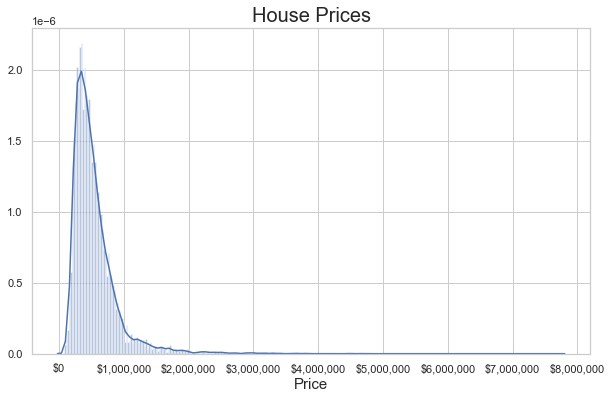

In [62]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df['price'], bins='auto')

fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.xaxis.set_major_formatter(tick_money)

ax.set_xlabel('Price', fontsize=15)
ax.set_title('House Prices', fontsize=20);

## Checking linearity & distribution and choosing categorical columns

In [63]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month_sold', 'week_sold', 'season_sold', 'was_renovated',
       'has_basement'],
      dtype='object')

In [64]:
def test_plot(df, col, target='price'):
    g = sns.jointplot(data=df, x=col, y=target, kind='reg', height=8)
    ax.set_title(f'{col} and {target}', fontsize=20)
    return g

In [65]:
import ipywidgets
from ipywidgets import interact

In [66]:
@interact
def explore_plot(col=num_cols):
#     for col in num_cols:
    test_plot(df, col)

interactive(children=(Dropdown(description='col', options=('price', 'bedrooms', 'bathrooms', 'sqft_living', 's…

In [67]:
categories = ['waterfront', 'condition', 'zipcode', 'was_renovated', 'has_basement', 
              'week_sold', 'month_sold', 'season_sold']
for col in categories:
    df[col] = df[col].astype('category')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 23 columns):
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null category
condition        21597 non-null category
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null category
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
month_sold       21597 non-null category
week_sold        21597 non-null category
season_sold      21597 non-null category
was_renovated    21597 non-null category
has_basement

## Mapping the data with latitude and longitude

In [196]:
fig= plt.figure(figsize=(15, 10))
g = sns.scatterplot(data=df, x='long', y='lat', hue='price', hue_norm=(0,1200000), palette='CMRmap_r')

g.set_title('Prices By Location', fontdict={'fontsize': 20})
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 1080x720 with 1 Axes>

In [70]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url='https://miro.medium.com/max/1175/1*a3bI75VBipbeIJoyAdYMeQ.png')

In [71]:
fig= plt.figure(figsize=(15, 10))
g = sns.scatterplot(data=df, x='long', y='lat', hue='sqft_living', hue_norm=(0,6000), palette='CMRmap_r')

g.set_title('House Square Footage and Location', fontdict={'fontsize': 20})
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 1080x720 with 1 Axes>

In [72]:
fig= plt.figure(figsize=(15, 10))
g = sns.scatterplot(data=df, x='long', y='lat', hue='sqft_lot', hue_norm=(0,30000), palette='CMRmap_r')

g.set_title('Lot Square Footage and Location', fontdict={'fontsize': 20})
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 1080x720 with 1 Axes>

## Categorical columns

In [73]:
def plot_categories(df):
    for col in df.select_dtypes('category'):
        fig, ax = plt.subplots(figsize=(12,8))
        sns.barplot(x=col, y='price', data=df, palette="husl")
        ax.set_title(f"{col} vs Price", fontsize=30)
        plt.xticks(rotation=45)
        plt.show()

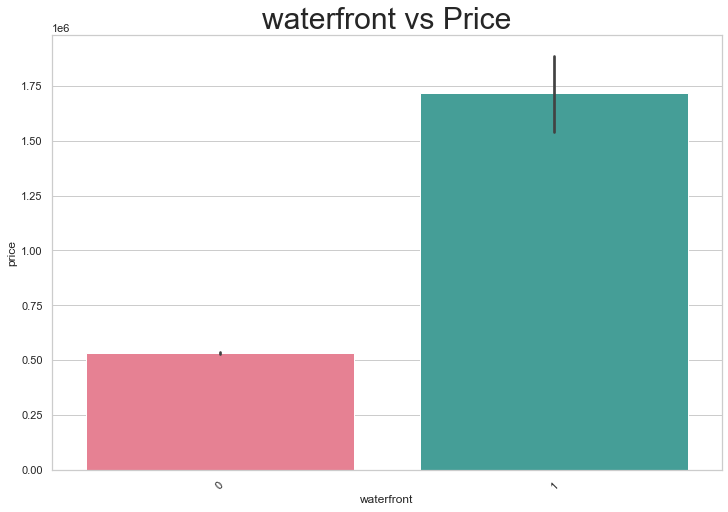

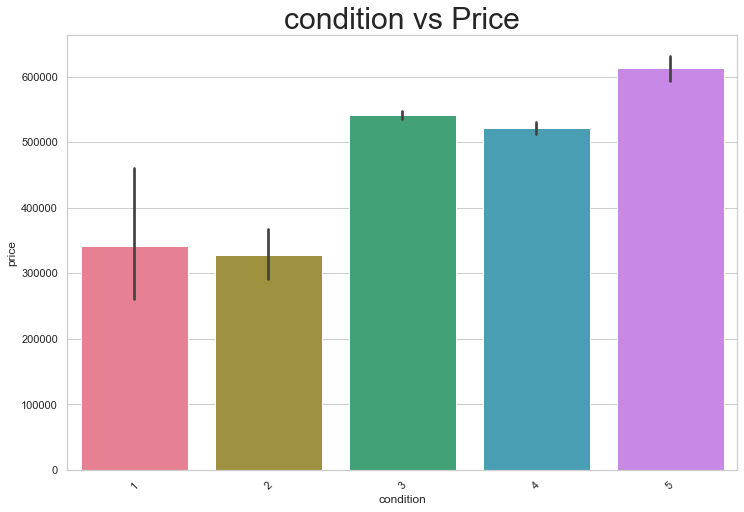

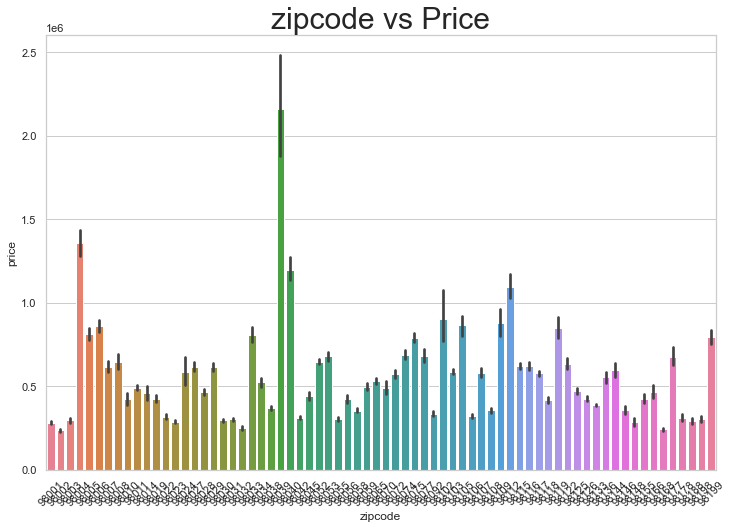

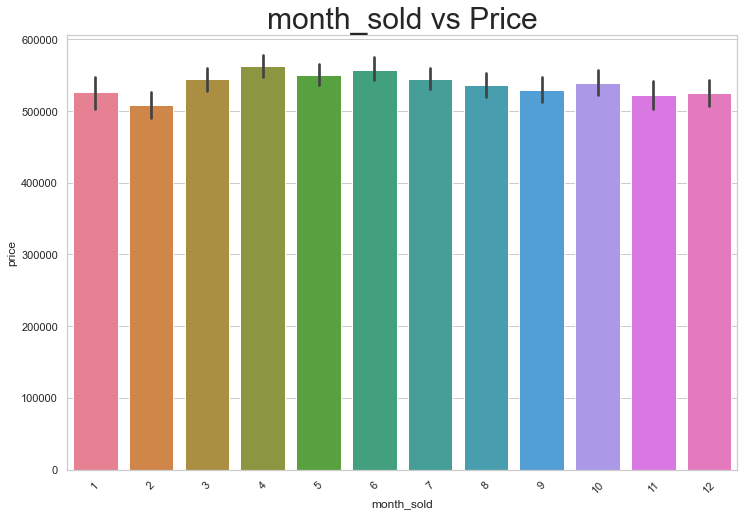

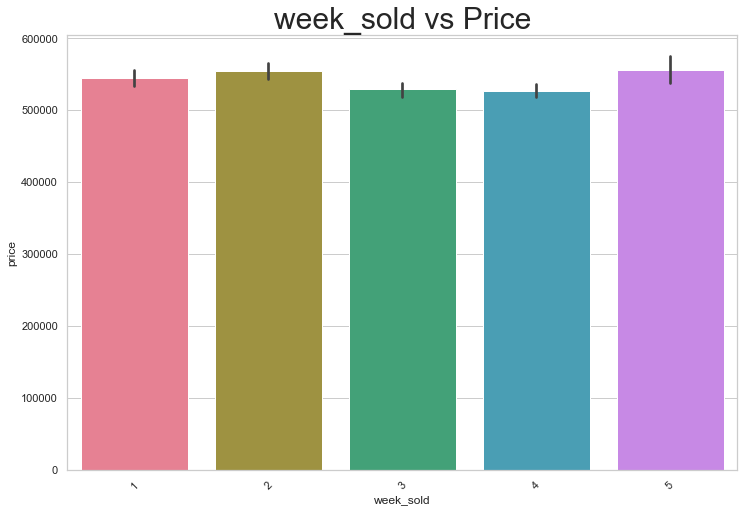

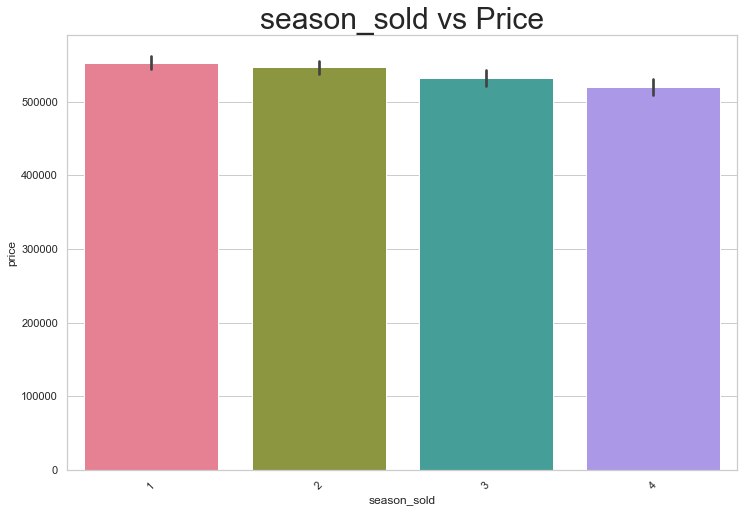

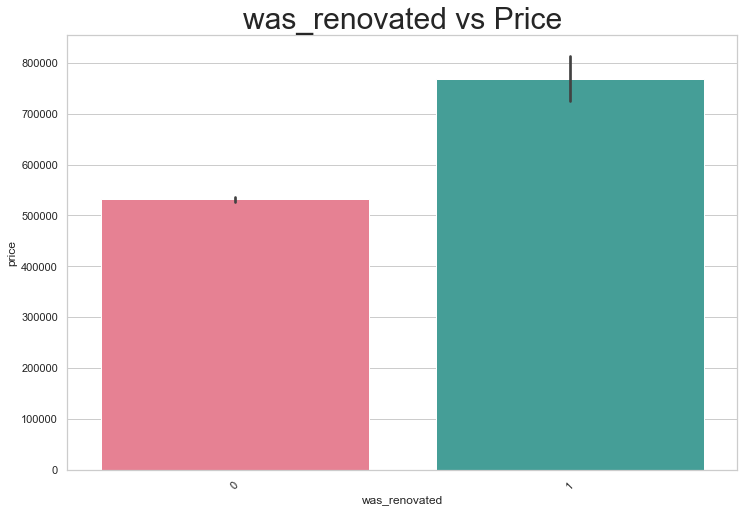

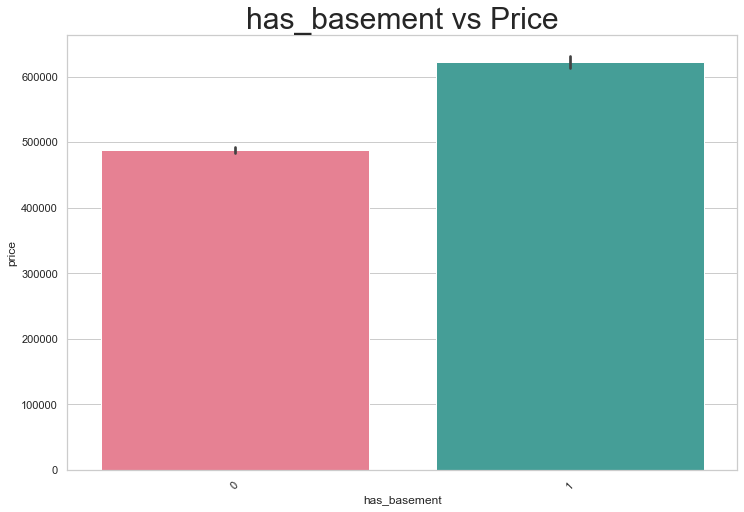

In [74]:
plot_categories(df)

<AxesSubplot:xlabel='month_sold'>

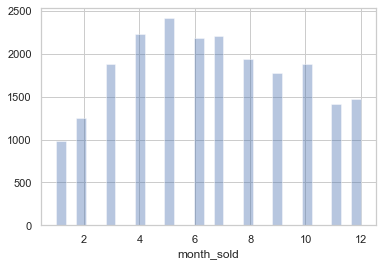

In [75]:
sns.distplot(df.month_sold, kde=False)

<AxesSubplot:xlabel='week_sold'>

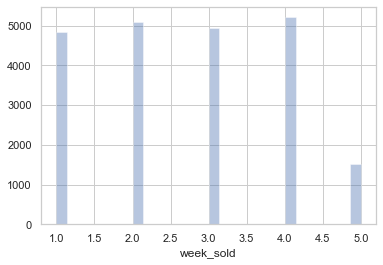

In [76]:
sns.distplot(df.week_sold, kde=False)

In [77]:
# sns.barplot(data=df, x=df.season_sold.value_counts(), y='season_sold')

Less houses sell in the winter. It looks unlikely that there are statistically significant differences in price by month sold, but it's possible that there are some small but significant effects there.

## Houses resold

In [78]:
houses_resold.id.value_counts()

795000620     3
8651402750    2
5536100020    2
9238500040    2
1995200200    2
1523049207    2
723049156     2
1446403850    2
7853400250    2
4222310010    2
2206700215    2
8832900780    2
1254200015    2
3432501415    2
1000102       2
2212200100    2
5132000140    2
8161020060    2
1219000473    2
7520000695    2
1450100390    2
7387500235    2
3333002450    2
324000530     2
1432400120    2
251300110     2
3262300940    2
6381500170    2
2231500030    2
4302201085    2
3630120700    2
6623400187    2
3904100089    2
302000375     2
526059224     2
2044500213    2
9834200305    2
5054800110    2
5127001320    2
7200179       2
5249801440    2
2019200220    2
9136103130    2
9250900104    2
4139480200    2
705730280     2
8945100320    2
3969300030    2
4435000705    2
2473380920    2
9407110710    2
8103000110    2
7893805650    2
6021500970    2
3185600040    2
1781500435    2
3303000130    2
641900050     2
8648900110    2
1922059278    2
9828200460    2
5430300171    2
75200005

In [208]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

In [209]:
profile

Number of variables,21
Number of observations,21597
Total Missing (%),1.4%
Total size in memory,3.5 MiB
Average record size in memory,168.0 B
Numeric,19
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# MODEL 1

## Preparing dataframe for modeling

In [79]:
model1_df = df.copy()
model1_df.drop(columns=['lat', 'long'], inplace=True)

In [80]:
model1_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,month_sold,week_sold,season_sold,was_renovated,has_basement
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900,3,1.000,1180,5650,1.000,0,3,7,1180,0,1955,0,98178,1340,5650,10,2,3,0,0
6414100192,538000,3,2.250,2570,7242,2.000,0,3,7,2170,400,1951,1991,98125,1690,7639,12,2,4,1,1
5631500400,180000,2,1.000,770,10000,1.000,0,3,6,770,0,1933,0,98028,2720,8062,2,4,4,0,0
2487200875,604000,4,3.000,1960,5000,1.000,0,5,7,1050,910,1965,0,98136,1360,5000,12,2,4,0,1
1954400510,510000,3,2.000,1680,8080,1.000,0,3,8,1680,0,1987,0,98074,1800,7503,2,3,4,0,0


In [81]:
model1_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,3.373,2.116,2080.322,15099.409,1.494,7.658,1788.597,285.717,1971.000,68.758,1986.620,12758.284
std,367368.140,0.926,0.769,918.106,41412.637,0.540,1.173,827.760,439.820,29.375,364.037,685.230,27274.442
min,78000.000,1.000,0.500,370.000,520.000,1.000,3.000,370.000,0.000,1900.000,0.000,399.000,651.000
25%,322000.000,3.000,1.750,1430.000,5040.000,1.000,7.000,1190.000,0.000,1951.000,0.000,1490.000,5100.000
50%,450000.000,3.000,2.250,1910.000,7618.000,1.500,7.000,1560.000,0.000,1975.000,0.000,1840.000,7620.000
75%,645000.000,4.000,2.500,2550.000,10685.000,2.000,8.000,2210.000,550.000,1997.000,0.000,2360.000,10083.000
max,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,13.000,9410.000,4820.000,2015.000,2015.000,6210.000,871200.000


## Writing modeling functions

In [82]:
model1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 21 columns):
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null category
condition        21597 non-null category
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null category
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
month_sold       21597 non-null category
week_sold        21597 non-null category
season_sold      21597 non-null category
was_renovated    21597 non-null category
has_basement     21597 non-null category
dtypes: category(8), float64(2), int64(11)
memory u

In [83]:
# def one_hot_encode(df):
#     cat_cols = df.select_dtypes('category').columns
#     model_df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
#     return model_df

In [84]:
def make_model(df, target='price', test_size=0.25, cv=20):
    
    X = df.drop([target], axis=1)
    y = df[[target]]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=123)
    
    df_train = pd.concat([y_train, X_train], axis=1)
    df_test = pd.concat([y_test, X_test], axis=1)
    
    cat_cols = df_train.select_dtypes('category').columns
    features = '+'.join(df_train.drop(columns=target).columns)
    for col in cat_cols:
        features = features.replace(col,f'C({col})')
    formula = target + '~' + features
    model = smf.ols(formula, df_train).fit()
    
    fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
    sm.graphics.qqplot(model.resid, fit=True, line='45', ax=axes[0])
    axes[0].set(title='QQ Plot Normality Check')
    
    ax=axes[1]
    ax.scatter(df_train['price'], model.resid)
    ax.axhline(0, color='red')
    axes[1].set(title='Homoscedasticity Check')

    plt.show();

    
    y_predicted = model.predict(X_test)
    r2_test = r2_score(y_test, y_predicted)
    
    plt.figure(figsize=(20,5))
    g = sns.scatterplot(range(len(y_predicted[:200])), y_predicted[:200], label='Predicted Prices')
    g = sns.scatterplot(range(len(y_test[:200])), y_test.price[:200], label='Actual Prices')

    plt.title('Comparison of predicted vs actual price', fontdict={'fontsize':20})
    plt.xlabel('Values')
    plt.ylabel('Prices')
    plt.legend()
    plt.show();
    
    print('Model test R2 score:', r2_test)
    
#     reg_train = linreg.fit(X_train, y_train)
#     reg_train_score = reg_train.score(X_train, y_train)
#     print('Sklearn train linear regression R^2 score:', reg_train_score)
    
#     reg_test_score = reg_train.score(X_test, y_test)
#     print('Sklearn test linear regression R^2 score:', reg_test_score)
    
    cv_result = np.mean(cross_val_score(linreg, X, y, cv=cv, scoring='neg_mean_squared_error'))
    print('K-fold cross validation negative MSE:', cv_result)
    
    display(model.summary())
                           
    return model

## First model results

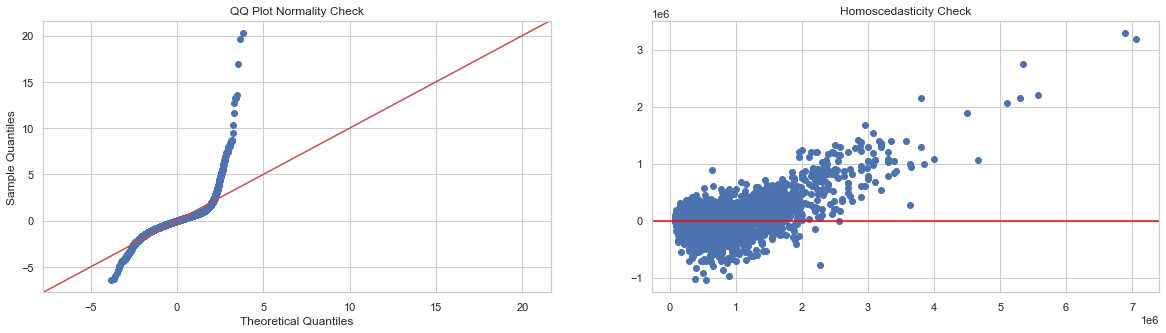

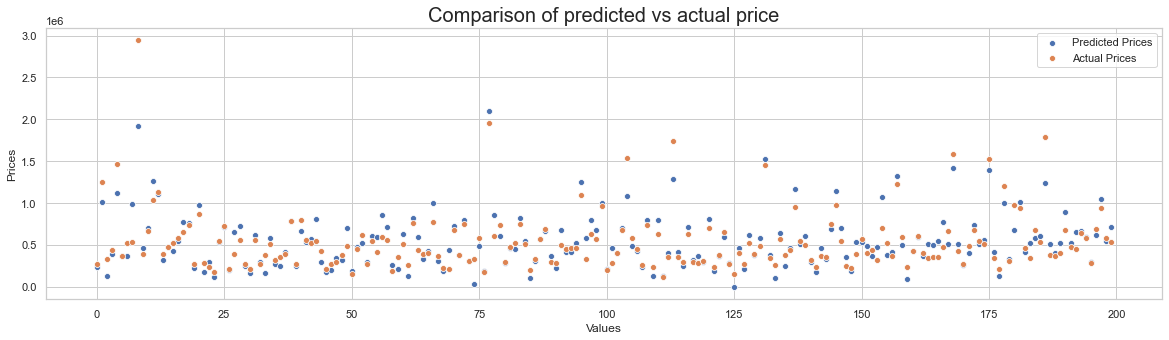

Model test R2 score: 0.7843321932932463
K-fold cross validation negative MSE: -47642086028.03113


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     647.2
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:50:45   Log-Likelihood:            -2.1732e+05
No. Observations:               16197   AIC:                         4.348e+05
Df Residuals:                   16093   BIC:                         4.356e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              9.303e+05   1.25e+05      7.418      0.000    6.85e+05    1.18e+06
C(waterfront)[T.1]     9.144e+05   1.63e+04     56.118      0.000    8.82e+05    9.46e+05
C(condition)[T.2]      3.061e+04   3.66e+04      0.835      0.403   -4.12e+04    1.02e+05
C(condition)[T.3]      1.385e+04   3.36e+04      0.412      0.680    -5.2e+04    7.97e+04
C(condition)[T.4]      3.811e+04   3.36e+04      1.134      0.257   -2.77e+04    1.04e+05
C(condition)[T.5]      7.748e+04   3.38e+04      2.291      0.022    1.12e+04    1.44e+05
C(zipcode)[T.98002]    2.677e+04   1.67e+04      1.607      0.108   -5884.092    5.94e+04
C(zipcode)[T.98003]   -1.567e+04   1.48e+04     -1.058      0.290   -4.47e+04    1.34e+04
C(zipcode)[T.98004]    7.586e+05   1.47e+04     51.708      0.000     7.3e+05    7.87e+05
C(zipcode)[T.98005]     2.73e+05   1.77e+04     15.407      0.000    2.38e+05    3.08e+05
C(zipcode)[T.98006]    2.545e+05   1.33e+04     19.069      0.000    2.28e+05    2.81e+05
C(zipcode)[T.98007]    2.286e+05   1.83e+04     12.498      0.000    1.93e+05    2.64e+05
C(zipcode)[T.98008]    2.487e+05   1.47e+04     16.929      0.000     2.2e+05    2.77e+05
C(zipcode)[T.98010]     6.28e+04   2.07e+04      3.038      0.002    2.23e+04    1.03e+05
C(zipcode)[T.98011]    1.071e+05   1.67e+04      6.404      0.000    7.43e+04     1.4e+05
C(zipcode)[T.98014]    1.033e+05      2e+04      5.156      0.000     6.4e+04    1.43e+05
C(zipcode)[T.98019]    7.649e+04   1.67e+04      4.593      0.000    4.38e+04    1.09e+05
C(zipcode)[T.98022]    9698.9697   1.61e+04      0.604      0.546   -2.18e+04    4.12e+04
C(zipcode)[T.98023]   -4.036e+04   1.32e+04     -3.066      0.002   -6.62e+04   -1.46e+04
C(zipcode)[T.98024]    1.366e+05   2.33e+04      5.874      0.000     9.1e+04    1.82e+05
C(zipcode)[T.98027]    1.466e+05   1.38e+04     10.625      0.000     1.2e+05    1.74e+05
C(zipcode)[T.98028]    1.142e+05   1.52e+04      7.529      0.000    8.45e+04    1.44e+05
C(zipcode)[T.98029]     1.97e+05   1.47e+04     13.383      0.000    1.68e+05    2.26e+05
C(zipcode)[T.98030]   -1.061e+04   1.58e+04     -0.673      0.501   -4.15e+04    2.03e+04
C(zipcode)[T.98031]    1431.1323   1.46e+04      0.098      0.922   -2.73e+04    3.01e+04
C(zipcode)[T.98032]    8626.2208   1.95e+04      0.443      0.658   -2.96e+04    4.68e+04
C(zipcode)[T.98033]    3.632e+05   1.36e+04     26.673      0.000    3.36e+05     3.9e+05
C(zipcode)[T.98034]    2.041e+05   1.27e+04     16.031      0.000    1.79e+05    2.29e+05
C(zipcode)[T.98038]    1.974e+04   1.26e+04      1.561      0.118   -5041.283    4.45e+04
C(zipcode)[T.98039]    1.292e+06   2.79e+04     46.311      0.000    1.24e+06    1.35e+06
C(zipcode)[T.98040]    5.191e+05   1.55e+04     33.583      0.000    4.89e+05    5.49e+05
C(zipcode)[T.98042]   -

In [85]:
model1 = make_model(model1_df)

Look at F statistic = F-statistic: A measure of how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals. Feeds into the calculation of the P-Value.

# SCRUB 2

In [86]:
# def z_outliers(data):
#     z_scores = np.abs(stats.zscore(data))
#     z_scores = pd.Series(z_scores, index=data.index)

#     return z_scores

In [87]:
# categories = model1_df.select_dtypes('category')
# for col in categories:
#     model1_df[col] = model1_df[col].astype('int64')

In [88]:
# model1_df.info()

In [89]:
# from yellowbrick.regressor import cooks_distance

In [90]:
# X = model1_df.drop(columns='price')
# X = sm.add_constant(X)
# y = model1_df['price']
# cooks = cooks_distance(
#     X, y)


In [91]:
# threshold = cooks.influence_threshold_

In [92]:
# distances = pd.DataFrame(cooks.distance_)

In [93]:
# model1_df['cooks'] = distances

In [94]:
# cooks_df = model1_df[(model1_df['cooks'] < threshold)]
# cooks_df.head()

In [95]:
# cooks_df.shape

In [96]:
# cooks_df.drop(columns='cooks', inplace=True)

In [97]:
# categories = ['waterfront', 'condition', 'zipcode', 'was_renovated', 'has_basement', 
#               'week_sold', 'month_sold', 'season_sold']
# for col in categories:
#     cooks_df[col] = cooks_df[col].astype('category')

In [98]:
# cooks_df.info()

In [99]:
# model_cooks = make_model(cooks_df)

In [100]:
def iqr_outliers(data, verbose=True):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    threshold = iqr * 1.5
    outliers = (data < q1 - threshold) | (data > q3 + threshold)
    outliers = pd.Series(outliers, index=data.index)
    if verbose:
        print(f'{outliers.sum()} outliers found')
    return outliers

In [101]:
def add_outliers_column(df, columns_list):
    new_df = df.copy()
    for col in columns_list:
        outliers = iqr_outliers(new_df[col])
        new_df[f'{col}_outliers'] = outliers
    return new_df

In [102]:
num_cols2 = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
             'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 
             'yr_renovated', 'sqft_living15', 'sqft_lot15']
model2_df = add_outliers_column(model1_df, num_cols2)

1158 outliers found
530 outliers found
561 outliers found
571 outliers found
2419 outliers found
0 outliers found
1905 outliers found
610 outliers found
560 outliers found
0 outliers found
744 outliers found
543 outliers found
2188 outliers found


In [103]:
model2_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,month_sold,week_sold,season_sold,was_renovated,has_basement,price_outliers,bedrooms_outliers,bathrooms_outliers,sqft_living_outliers,sqft_lot_outliers,floors_outliers,grade_outliers,sqft_above_outliers,sqft_basement_outliers,yr_built_outliers,yr_renovated_outliers,sqft_living15_outliers,sqft_lot15_outliers
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,221900,3,1.000,1180,5650,1.000,0,3,7,1180,0,1955,0,98178,1340,5650,10,2,3,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False
6414100192,538000,3,2.250,2570,7242,2.000,0,3,7,2170,400,1951,1991,98125,1690,7639,12,2,4,1,1,False,False,False,False,False,False,False,False,False,False,True,False,False
5631500400,180000,2,1.000,770,10000,1.000,0,3,6,770,0,1933,0,98028,2720,8062,2,4,4,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False
2487200875,604000,4,3.000,1960,5000,1.000,0,5,7,1050,910,1965,0,98136,1360,5000,12,2,4,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False
1954400510,510000,3,2.000,1680,8080,1.000,0,3,8,1680,0,1987,0,98074,1800,7503,2,3,4,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False


In [104]:
model2_df.shape

(21597, 34)

In [105]:
for col in num_cols2:
    model2_df = model2_df[(model2_df[col+'_outliers']==False)]
model2_df.shape

(16122, 34)

In [106]:
for col in num_cols2:
    model2_df.drop(columns=[col+'_outliers'], axis=1, inplace=True)
model2_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,month_sold,week_sold,season_sold,was_renovated,has_basement
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900,3,1.000,1180,5650,1.000,0,3,7,1180,0,1955,0,98178,1340,5650,10,2,3,0,0
5631500400,180000,2,1.000,770,10000,1.000,0,3,6,770,0,1933,0,98028,2720,8062,2,4,4,0,0
2487200875,604000,4,3.000,1960,5000,1.000,0,5,7,1050,910,1965,0,98136,1360,5000,12,2,4,0,1
1954400510,510000,3,2.000,1680,8080,1.000,0,3,8,1680,0,1987,0,98074,1800,7503,2,3,4,0,0
1321400060,257500,3,2.250,1715,6819,2.000,0,3,7,1715,0,1995,0,98003,2238,6819,6,4,2,0,0


In [107]:
model2_df.was_renovated.value_counts()

0    16122
1        0
Name: was_renovated, dtype: int64

In [108]:
model2_df.drop(columns=['was_renovated'], axis=1, inplace=True)

In [109]:
model2_df.yr_renovated.value_counts()

0    16122
Name: yr_renovated, dtype: int64

In [110]:
model2_df.drop(columns=['yr_renovated'], axis=1, inplace=True)

In [111]:
model2_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,month_sold,week_sold,season_sold,has_basement
id,,,,,,,,,,,,,,,,,,,
7129300520,221900,3,1.000,1180,5650,1.000,0,3,7,1180,0,1955,98178,1340,5650,10,2,3,0
5631500400,180000,2,1.000,770,10000,1.000,0,3,6,770,0,1933,98028,2720,8062,2,4,4,0
2487200875,604000,4,3.000,1960,5000,1.000,0,5,7,1050,910,1965,98136,1360,5000,12,2,4,1
1954400510,510000,3,2.000,1680,8080,1.000,0,3,8,1680,0,1987,98074,1800,7503,2,3,4,0
1321400060,257500,3,2.250,1715,6819,2.000,0,3,7,1715,0,1995,98003,2238,6819,6,4,2,0


In [112]:
model2_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,16122.000,16122.000,16122.000,16122.000,16122.000,16122.000,16122.000,16122.000,16122.000,16122.000,16122.000,16122.000
mean,448282.177,3.267,1.982,1833.601,7055.585,1.467,7.401,1590.166,238.279,1970.953,1817.682,6933.006
std,186265.943,0.773,0.648,621.745,3386.443,0.546,0.811,600.492,359.908,29.361,515.460,3020.676
min,82000.000,2.000,0.750,560.000,520.000,1.000,6.000,480.000,0.000,1900.000,620.000,651.000
25%,305000.000,3.000,1.500,1360.000,4751.000,1.000,7.000,1140.000,0.000,1951.000,1440.000,4822.250
50%,415000.000,3.000,2.000,1760.000,7056.000,1.000,7.000,1440.000,0.000,1973.000,1720.000,7193.000
75%,559375.000,4.000,2.500,2240.000,9000.000,2.000,8.000,1920.000,480.000,1998.000,2130.000,8748.000
max,1120000.000,5.000,3.500,4200.000,19141.000,3.500,9.000,3740.000,1370.000,2015.000,3640.000,17550.000


# EXPLORE 2

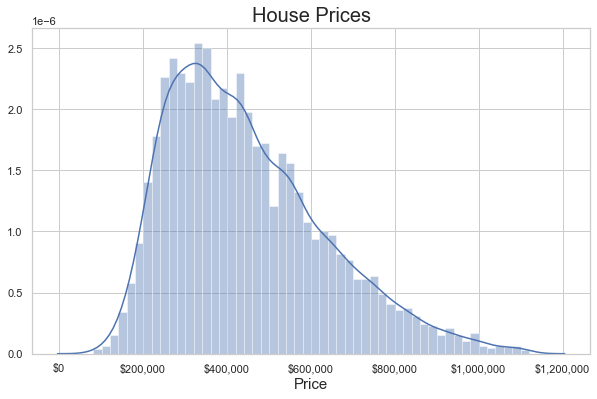

In [113]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(model2_df['price'], bins='auto')

fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.xaxis.set_major_formatter(tick_money)

ax.set_xlabel('Price', fontsize=15)
ax.set_title('House Prices', fontsize=20);

In [114]:
@interact
def explore_plot(col=num_cols2):
#     for col in num_cols:
    test_plot(model2_df, col)

interactive(children=(Dropdown(description='col', options=('price', 'bedrooms', 'bathrooms', 'sqft_living', 's…

# MODEL 2

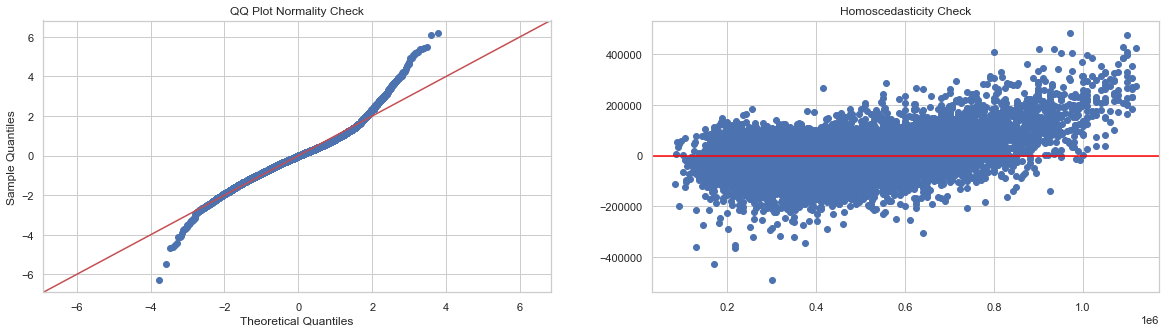

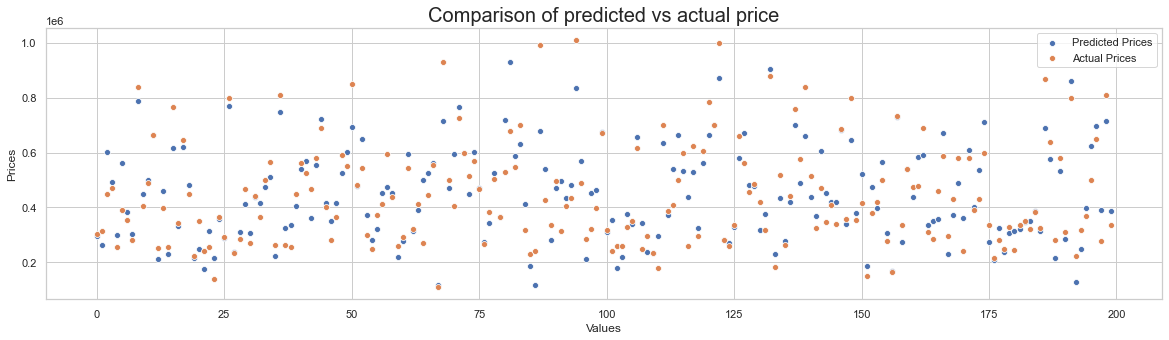

Model test R2 score: 0.8260222827922701
K-fold cross validation negative MSE: -16465565550.86124


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     561.8
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:50:50   Log-Likelihood:            -1.5337e+05
No. Observations:               12091   AIC:                         3.069e+05
Df Residuals:                   11989   BIC:                         3.077e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.269e+05   7.61e+04      6.929      0.000    3.78e+05    6.76e+05
C(waterfront)[T.1]    3.816e+05   2.66e+04     14.371      0.000     3.3e+05    4.34e+05
C(condition)[T.2]     1.211e+05   3.11e+04      3.891      0.000    6.01e+04    1.82e+05
C(condition)[T.3]     1.518e+05   2.98e+04      5.094      0.000    9.34e+04     2.1e+05
C(condition)[T.4]     1.733e+05   2.98e+04      5.816      0.000    1.15e+05    2.32e+05
C(condition)[T.5]     2.076e+05   2.99e+04      6.951      0.000    1.49e+05    2.66e+05
C(zipcode)[T.98002]   1.797e+04   8879.620      2.024      0.043     569.312    3.54e+04
C(zipcode)[T.98003]   9142.2234   8130.705      1.124      0.261   -6795.275    2.51e+04
C(zipcode)[T.98004]    5.14e+05   9581.754     53.646      0.000    4.95e+05    5.33e+05
C(zipcode)[T.98005]   3.217e+05   1.07e+04     30.055      0.000    3.01e+05    3.43e+05
C(zipcode)[T.98006]   2.604e+05   7879.585     33.048      0.000    2.45e+05    2.76e+05
C(zipcode)[T.98007]   2.395e+05   1.02e+04     23.536      0.000     2.2e+05    2.59e+05
C(zipcode)[T.98008]    2.37e+05   8115.050     29.207      0.000    2.21e+05    2.53e+05
C(zipcode)[T.98010]   8.706e+04    1.7e+04      5.123      0.000    5.37e+04     1.2e+05
C(zipcode)[T.98011]   1.451e+05   9106.905     15.929      0.000    1.27e+05    1.63e+05
C(zipcode)[T.98014]   1.037e+05   1.59e+04      6.529      0.000    7.26e+04    1.35e+05
C(zipcode)[T.98019]   9.381e+04   9667.181      9.704      0.000    7.49e+04    1.13e+05
C(zipcode)[T.98022]   1.455e+04   9769.256      1.489      0.136   -4600.582    3.37e+04
C(zipcode)[T.98023]  -1.189e+04   7145.700     -1.664      0.096   -2.59e+04    2113.011
C(zipcode)[T.98024]   1.543e+05   2.25e+04      6.851      0.000     1.1e+05    1.98e+05
C(zipcode)[T.98027]    2.27e+05   8431.724     26.925      0.000     2.1e+05    2.44e+05
C(zipcode)[T.98028]   1.326e+05   8198.972     16.179      0.000    1.17e+05    1.49e+05
C(zipcode)[T.98029]   2.325e+05   7786.459     29.855      0.000    2.17e+05    2.48e+05
C(zipcode)[T.98030]   3259.5557   8121.115      0.401      0.688   -1.27e+04    1.92e+04
C(zipcode)[T.98031]   1.108e+04   8135.851      1.362      0.173   -4870.318     2.7e+04
C(zipcode)[T.98032]   2752.8187   1.05e+04      0.263      0.793   -1.78e+04    2.33e+04
C(zipcode)[T.98033]   3.093e+05   7628.128     40.553      0.000    2.94e+05    3.24e+05
C(zipcode)[T.98034]   1.904e+05   6981.473     27.265      0.000    1.77e+05    2.04e+05
C(zipcode)[T.98038]   3.768e+04   7014.406      5.371      0.000    2.39e+04    5.14e+04
C(zipcode)[T.98039]   6.368e+05   3.26e+04     19.557      0.000    5.73e+05    7.01e+05
C(zipcode)[T.98040]   4.206e+05   1.06e+04     39.594      0.000       4e+05    4.41e+05
C(zipcode)[T.98042]   9756.5307   7101.154      1.374    

In [115]:
model2 = make_model(model2_df)

## Comparing p-values

In [116]:
pvalues_model1 = model1.pvalues

In [117]:
pvalues_model2 = model2.pvalues

In [118]:
pvalues_compare = pd.DataFrame(pvalues_model1)

In [119]:
pvalues_compare['model2'] = pvalues_model2

In [120]:
pvalues_compare.rename(columns={0: 'model1'}, inplace=True)

In [121]:
pvalues_compare['change'] = pvalues_compare['model2'] - pvalues_compare['model1']

In [122]:
pvalues_compare.T

,Intercept,C(waterfront)[T.1],C(condition)[T.2],C(condition)[T.3],C(condition)[T.4],C(condition)[T.5],C(zipcode)[T.98002],C(zipcode)[T.98003],C(zipcode)[T.98004],C(zipcode)[T.98005],C(zipcode)[T.98006],C(zipcode)[T.98007],C(zipcode)[T.98008],C(zipcode)[T.98010],C(zipcode)[T.98011],C(zipcode)[T.98014],C(zipcode)[T.98019],C(zipcode)[T.98022],C(zipcode)[T.98023],C(zipcode)[T.98024],C(zipcode)[T.98027],C(zipcode)[T.98028],C(zipcode)[T.98029],C(zipcode)[T.98030],C(zipcode)[T.98031],C(zipcode)[T.98032],C(zipcode)[T.98033],C(zipcode)[T.98034],C(zipcode)[T.98038],C(zipcode)[T.98039],C(zipcode)[T.98040],C(zipcode)[T.98042],C(zipcode)[T.98045],C(zipcode)[T.98052],C(zipcode)[T.98053],C(zipcode)[T.98055],C(zipcode)[T.98056],C(zipcode)[T.98058],C(zipcode)[T.98059],C(zipcode)[T.98065],...,C(zipcode)[T.98155],C(zipcode)[T.98166],C(zipcode)[T.98168],C(zipcode)[T.98177],C(zipcode)[T.98178],C(zipcode)[T.98188],C(zipcode)[T.98198],C(zipcode)[T.98199],C(month_sold)[T.2],C(month_sold)[T.3],C(month_sold)[T.4],C(month_sold)[T.5],C(month_sold)[T.6],C(month_sold)[T.7],C(month_sold)[T.8],C(month_sold)[T.9],C(month_sold)[T.10],C(month_sold)[T.11],C(month_sold)[T.12],C(week_sold)[T.2],C(week_sold)[T.3],C(week_sold)[T.4],C(week_sold)[T.5],C(season_sold)[T.2],C(season_sold)[T.3],C(season_sold)[T.4],C(was_renovated)[T.1],C(has_basement)[T.1],bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
model1,0.000,0.000,0.403,0.680,0.257,0.022,0.108,0.290,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.546,0.002,0.000,0.000,0.000,0.000,0.501,0.922,0.658,0.000,0.000,0.118,0.000,0.000,0.835,0.000,0.000,0.000,0.014,0.000,0.185,0.000,0.000,...,0.000,0.000,0.000,0.000,0.001,0.009,0.181,0.000,0.283,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.201,0.147,0.026,0.001,0.495,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.020,0.000,0.000,0.000,0.085
model2,0.000,0.000,0.000,0.000,0.000,0.000,0.043,0.261,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.136,0.096,0.000,0.000,0.000,0.000,0.688,0.173,0.793,0.000,0.000,0.000,0.000,0.000,0.169,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.011,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.725,0.694,0.624,0.079,0.441,0.000,0.000,0.000,nan,0.005,0.001,0.000,0.000,0.012,0.000,0.000,0.000,0.409,0.000,nan,0.000,0.148
change,0.000,0.000,-0.403,-0.680,-0.257,-0.022,-0.065,-0.029,0.000,-0.000,-0.000,-0.000,-0.000,-0.002,-0.000,-0.000,-0.000,-0.409,0.094,-0.000,-0.000,-0.000,-0.000,0.187,-0.749,0.134,-0.000,-0.000,-0.118,0.000,-0.000,-0.666,-0.000,-0.000,-0.000,-0.014,-0.000,-0.185,-0.000,-0.000,...,-0.000,-0.000,-0.000,-0.000,-0.001,-0.009,-0.181,-0.000,-0.271,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.524,0.548,0.597,0.078,-0.054,0.000,0.000,0.000,nan,0.005,0.001,0.000,-0.000,0.012,0.000,-0.000,0.000,0.389,-0.000,nan,-0.000,0.063


> Add styler to this table

## Removing low p-value columns

In [123]:
def bad_pvalues(model, verbose=True):
    pvalues = model.pvalues
    bad_features = pvalues[pvalues > .05]
    if 'Intercept' in bad_features:
        bad_features.remove('Intercept')
    if verbose:
        print(f'{len(bad_features)} bad p-values to be reviewed:\n' + f'{bad_features}')
    return bad_features

In [124]:
# def remove_bad_pvalues(model, df, verbose=True):
#     pvalues = model.pvalues
#     bad_features = list(pvalues[pvalues > .05].index)
#     if 'Intercept' in bad_features:
#         bad_features.remove('Intercept')
#     if verbose:
#         print(f'{len(bad_features)} columns to be removed:', bad_features)
#     new_df = df.copy()
#     new_df.drop(columns=[*bad_features], axis=1, inplace=True)
#     return new_df

In [125]:
model2_badfeatures = bad_pvalues(model2)

14 bad p-values to be reviewed:
C(zipcode)[T.98003]   0.261
C(zipcode)[T.98022]   0.136
C(zipcode)[T.98023]   0.096
C(zipcode)[T.98030]   0.688
C(zipcode)[T.98031]   0.173
C(zipcode)[T.98032]   0.793
C(zipcode)[T.98042]   0.169
C(month_sold)[T.12]   0.725
C(week_sold)[T.2]     0.694
C(week_sold)[T.3]     0.624
C(week_sold)[T.4]     0.079
C(week_sold)[T.5]     0.441
sqft_basement         0.409
sqft_lot15            0.148
dtype: float64


In [126]:
model2_df.shape

(16122, 19)

In [127]:
model3_df = model2_df.copy()
model3_df.drop(columns=(['week_sold', 'sqft_basement', 'sqft_lot15']), inplace=True)
model3_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,month_sold,season_sold,has_basement
id,,,,,,,,,,,,,,,,
7129300520,221900,3,1.000,1180,5650,1.000,0,3,7,1180,1955,98178,1340,10,3,0
5631500400,180000,2,1.000,770,10000,1.000,0,3,6,770,1933,98028,2720,2,4,0
2487200875,604000,4,3.000,1960,5000,1.000,0,5,7,1050,1965,98136,1360,12,4,1
1954400510,510000,3,2.000,1680,8080,1.000,0,3,8,1680,1987,98074,1800,2,4,0
1321400060,257500,3,2.250,1715,6819,2.000,0,3,7,1715,1995,98003,2238,6,2,0


In [128]:
model3_df.shape

(16122, 16)

# Model 3

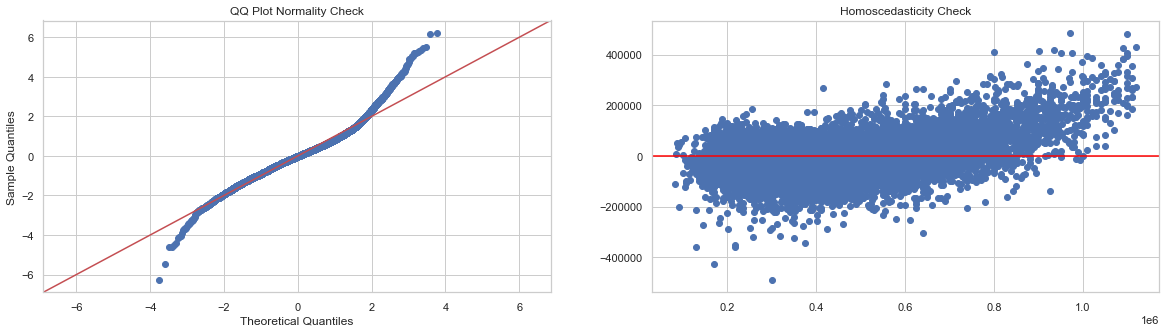

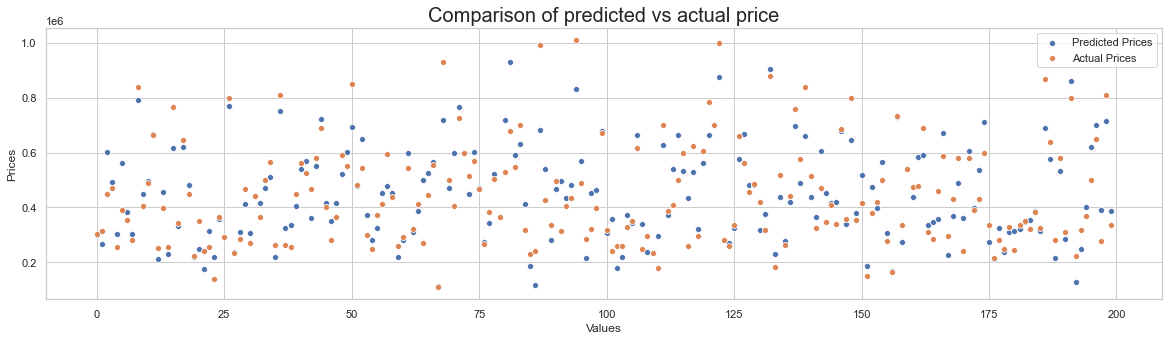

Model test R2 score: 0.826054188669332
K-fold cross validation negative MSE: -16541599242.311651


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     597.2
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:50:52   Log-Likelihood:            -1.5337e+05
No. Observations:               12091   AIC:                         3.069e+05
Df Residuals:                   11995   BIC:                         3.076e+05
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              5.26e+05    7.6e+04      6.923      0.000    3.77e+05    6.75e+05
C(waterfront)[T.1]    3.825e+05   2.65e+04     14.424      0.000     3.3e+05    4.34e+05
C(condition)[T.2]     1.219e+05   3.11e+04      3.920      0.000    6.09e+04    1.83e+05
C(condition)[T.3]     1.526e+05   2.98e+04      5.122      0.000    9.42e+04    2.11e+05
C(condition)[T.4]     1.741e+05   2.98e+04      5.847      0.000    1.16e+05    2.33e+05
C(condition)[T.5]     2.084e+05   2.98e+04      6.983      0.000     1.5e+05    2.67e+05
C(zipcode)[T.98002]    1.78e+04   8874.717      2.006      0.045     402.804    3.52e+04
C(zipcode)[T.98003]   9165.7592   8129.817      1.127      0.260   -6769.998    2.51e+04
C(zipcode)[T.98004]   5.144e+05   9577.582     53.713      0.000    4.96e+05    5.33e+05
C(zipcode)[T.98005]   3.221e+05   1.07e+04     30.093      0.000    3.01e+05    3.43e+05
C(zipcode)[T.98006]   2.609e+05   7874.987     33.127      0.000    2.45e+05    2.76e+05
C(zipcode)[T.98007]   2.398e+05   1.02e+04     23.571      0.000     2.2e+05     2.6e+05
C(zipcode)[T.98008]   2.371e+05   8113.340     29.228      0.000    2.21e+05    2.53e+05
C(zipcode)[T.98010]   8.759e+04    1.7e+04      5.157      0.000    5.43e+04    1.21e+05
C(zipcode)[T.98011]   1.453e+05   9103.831     15.958      0.000    1.27e+05    1.63e+05
C(zipcode)[T.98014]   1.049e+05   1.59e+04      6.609      0.000    7.38e+04    1.36e+05
C(zipcode)[T.98019]   9.417e+04   9665.079      9.744      0.000    7.52e+04    1.13e+05
C(zipcode)[T.98022]   1.465e+04   9767.010      1.500      0.134   -4490.041    3.38e+04
C(zipcode)[T.98023]  -1.176e+04   7143.725     -1.646      0.100   -2.58e+04    2247.378
C(zipcode)[T.98024]   1.555e+05   2.25e+04      6.912      0.000    1.11e+05       2e+05
C(zipcode)[T.98027]   2.268e+05   8412.519     26.964      0.000     2.1e+05    2.43e+05
C(zipcode)[T.98028]    1.33e+05   8192.457     16.240      0.000    1.17e+05    1.49e+05
C(zipcode)[T.98029]   2.317e+05   7756.652     29.875      0.000    2.17e+05    2.47e+05
C(zipcode)[T.98030]   3200.5916   8114.546      0.394      0.693   -1.27e+04    1.91e+04
C(zipcode)[T.98031]   1.093e+04   8134.109      1.343      0.179   -5016.332    2.69e+04
C(zipcode)[T.98032]   2742.6209   1.05e+04      0.262      0.793   -1.78e+04    2.33e+04
C(zipcode)[T.98033]   3.097e+05   7625.308     40.612      0.000    2.95e+05    3.25e+05
C(zipcode)[T.98034]   1.904e+05   6975.712     27.295      0.000    1.77e+05    2.04e+05
C(zipcode)[T.98038]   3.743e+04   7001.733      5.345      0.000    2.37e+04    5.12e+04
C(zipcode)[T.98039]   6.375e+05   3.26e+04     19.580      0.000    5.74e+05    7.01e+05
C(zipcode)[T.98040]   4.212e+05   1.06e+04     39.665      0.000       4e+05    4.42e+05
C(zipcode)[T.98042]   9565.7676   7096.289      1.348    

In [129]:
model3 = make_model(model3_df)

In [130]:
pvalues_compare['model3'] = model3.pvalues

In [131]:
pvalues_compare['change2'] = pvalues_compare['model3'] - pvalues_compare['model2']

In [132]:
pvalues_compare.T

,Intercept,C(waterfront)[T.1],C(condition)[T.2],C(condition)[T.3],C(condition)[T.4],C(condition)[T.5],C(zipcode)[T.98002],C(zipcode)[T.98003],C(zipcode)[T.98004],C(zipcode)[T.98005],C(zipcode)[T.98006],C(zipcode)[T.98007],C(zipcode)[T.98008],C(zipcode)[T.98010],C(zipcode)[T.98011],C(zipcode)[T.98014],C(zipcode)[T.98019],C(zipcode)[T.98022],C(zipcode)[T.98023],C(zipcode)[T.98024],C(zipcode)[T.98027],C(zipcode)[T.98028],C(zipcode)[T.98029],C(zipcode)[T.98030],C(zipcode)[T.98031],C(zipcode)[T.98032],C(zipcode)[T.98033],C(zipcode)[T.98034],C(zipcode)[T.98038],C(zipcode)[T.98039],C(zipcode)[T.98040],C(zipcode)[T.98042],C(zipcode)[T.98045],C(zipcode)[T.98052],C(zipcode)[T.98053],C(zipcode)[T.98055],C(zipcode)[T.98056],C(zipcode)[T.98058],C(zipcode)[T.98059],C(zipcode)[T.98065],...,C(zipcode)[T.98155],C(zipcode)[T.98166],C(zipcode)[T.98168],C(zipcode)[T.98177],C(zipcode)[T.98178],C(zipcode)[T.98188],C(zipcode)[T.98198],C(zipcode)[T.98199],C(month_sold)[T.2],C(month_sold)[T.3],C(month_sold)[T.4],C(month_sold)[T.5],C(month_sold)[T.6],C(month_sold)[T.7],C(month_sold)[T.8],C(month_sold)[T.9],C(month_sold)[T.10],C(month_sold)[T.11],C(month_sold)[T.12],C(week_sold)[T.2],C(week_sold)[T.3],C(week_sold)[T.4],C(week_sold)[T.5],C(season_sold)[T.2],C(season_sold)[T.3],C(season_sold)[T.4],C(was_renovated)[T.1],C(has_basement)[T.1],bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
model1,0.000,0.000,0.403,0.680,0.257,0.022,0.108,0.290,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.546,0.002,0.000,0.000,0.000,0.000,0.501,0.922,0.658,0.000,0.000,0.118,0.000,0.000,0.835,0.000,0.000,0.000,0.014,0.000,0.185,0.000,0.000,...,0.000,0.000,0.000,0.000,0.001,0.009,0.181,0.000,0.283,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.201,0.147,0.026,0.001,0.495,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.020,0.000,0.000,0.000,0.085
model2,0.000,0.000,0.000,0.000,0.000,0.000,0.043,0.261,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.136,0.096,0.000,0.000,0.000,0.000,0.688,0.173,0.793,0.000,0.000,0.000,0.000,0.000,0.169,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.011,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.725,0.694,0.624,0.079,0.441,0.000,0.000,0.000,nan,0.005,0.001,0.000,0.000,0.012,0.000,0.000,0.000,0.409,0.000,nan,0.000,0.148
change,0.000,0.000,-0.403,-0.680,-0.257,-0.022,-0.065,-0.029,0.000,-0.000,-0.000,-0.000,-0.000,-0.002,-0.000,-0.000,-0.000,-0.409,0.094,-0.000,-0.000,-0.000,-0.000,0.187,-0.749,0.134,-0.000,-0.000,-0.118,0.000,-0.000,-0.666,-0.000,-0.000,-0.000,-0.014,-0.000,-0.185,-0.000,-0.000,...,-0.000,-0.000,-0.000,-0.000,-0.001,-0.009,-0.181,-0.000,-0.271,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.524,0.548,0.597,0.078,-0.054,0.000,0.000,0.000,nan,0.005,0.001,0.000,-0.000,0.012,0.000,-0.000,0.000,0.389,-0.000,nan,-0.000,0.063
model3,0.000,0.000,0.000,0.000,0.000,0.000,0.045,0.260,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.134,0.100,0.000,0.000,0.000,0.000,0.693,0.179,0.793,0.000,0.000,0.000,0.000,0.000,0.178,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.011,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.795,nan,nan,nan,nan,0.000,0.000,0.000,nan,0.008,0.001,0.000,0.000,0.000,0.000,0.000,0.000,nan,0.000,nan,0.000,nan
change2,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.002,-0.001,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.003,0.004,-0.000,-0.000,-0.000,-0.000,0.005,0.006,0.001,0.000,-0.000,0.000,-0.000,0.000,0.008,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,...,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.070,nan,nan,nan,nan,0.000,0.000,0.000,nan,0.003,0.000,0.000,-0.000,-0.012,-0.000,-0.000,-0.000,nan,-0.000,nan,-0.000,nan


In [133]:
model3_badfeatures = bad_pvalues(model3)

8 bad p-values to be reviewed:
C(zipcode)[T.98003]   0.260
C(zipcode)[T.98022]   0.134
C(zipcode)[T.98023]   0.100
C(zipcode)[T.98030]   0.693
C(zipcode)[T.98031]   0.179
C(zipcode)[T.98032]   0.793
C(zipcode)[T.98042]   0.178
C(month_sold)[T.12]   0.795
dtype: float64


# Multicolinearity

In [134]:
def multicol_plot(df):
    new_df = df.copy()
    categories = new_df.select_dtypes('category')
    for col in categories:
        new_df[col]= new_df[col].astype('int64')  
       
    corr = abs(new_df.corr())
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    
    fig = plt.figure()
    fig.set_size_inches(10,10)
    sns.heatmap(corr, annot=True, mask=mask)
    plt.show();
    
    return corr

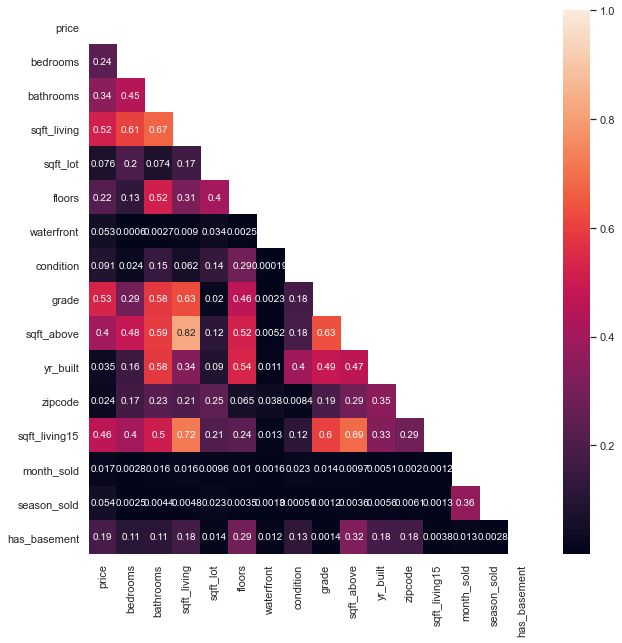

In [135]:
correlation_chart = multicol_plot(model3_df)

In [136]:
correlation_chart.style.background_gradient(cmap='Greens')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,month_sold,season_sold,has_basement
price,1,0.237457,0.344668,0.522328,0.0762702,0.219839,0.0534532,0.0911319,0.533841,0.402002,0.0347574,0.0243219,0.463089,0.0170441,0.0538934,0.187784
bedrooms,0.237457,1,0.447723,0.609147,0.20141,0.129827,0.00059643,0.0242901,0.291687,0.481163,0.157966,0.174633,0.40471,0.00277392,0.00250179,0.112418
bathrooms,0.344668,0.447723,1,0.672121,0.0743924,0.516455,0.00273389,0.147599,0.582263,0.592107,0.584608,0.229822,0.504027,0.0157355,0.0043617,0.113961
sqft_living,0.522328,0.609147,0.672121,1,0.170274,0.312153,0.00898365,0.0619846,0.628006,0.82471,0.335867,0.206035,0.719121,0.0161347,0.00476474,0.178653
sqft_lot,0.0762702,0.20141,0.0743924,0.170274,1,0.404885,0.0338113,0.137842,0.0199451,0.118953,0.0901306,0.246009,0.208027,0.00963821,0.0232313,0.0141077
floors,0.219839,0.129827,0.516455,0.312153,0.404885,1,0.00250271,0.290462,0.461687,0.520409,0.536616,0.0645509,0.236684,0.0101662,0.0035428,0.288323
waterfront,0.0534532,0.00059643,0.00273389,0.00898365,0.0338113,0.00250271,1,0.000186098,0.00226152,0.00521935,0.0107234,0.037741,0.0125482,0.00161104,0.00129372,0.0118022
condition,0.0911319,0.0242901,0.147599,0.0619846,0.137842,0.290462,0.000186098,1,0.180226,0.18445,0.395206,0.00838081,0.117543,0.0226444,0.000506311,0.128171
grade,0.533841,0.291687,0.582263,0.628006,0.0199451,0.461687,0.00226152,0.180226,1,0.634543,0.489957,0.190158,0.602471,0.0139993,0.00122525,0.00139674
sqft_above,0.402002,0.481163,0.592107,0.82471,0.118953,0.520409,0.00521935,0.18445,0.634543,1,0.465798,0.29181,0.688441,0.00968929,0.0035995,0.321677


## VIF

In [137]:
def vif_results(df, target='price'):
    
    new_df = df.drop(columns=target, axis=1)
    new_df = sm.add_constant(new_df)
    categories = new_df.select_dtypes('category')
    for col in categories:
        new_df[col]= new_df[col].astype('int64')    

    vif_list = []
    for x in range(new_df.shape[1]):
        vif = variance_inflation_factor(new_df.values, x)
        vif_list.append(vif)
    results = pd.Series(dict(zip(new_df.columns, vif_list)))
    print(results)
    
    threshold = 6
    bad_columns = list(results[results > threshold].index)
    if 'const' in bad_columns:
        bad_columns.remove('const')
    return bad_columns

In [138]:
vif_columns = vif_results(model3_df)

const           4587161.856
bedrooms              1.694
bathrooms             2.951
sqft_living          12.728
sqft_lot              1.568
floors                2.636
waterfront            1.005
condition             1.269
grade                 2.250
sqft_above           13.447
yr_built              2.312
zipcode               1.348
sqft_living15         2.495
month_sold            1.155
season_sold           1.154
has_basement          3.769
dtype: float64


In [139]:
vif_columns

['sqft_living', 'sqft_above']

In [140]:
model4_df = model3_df.copy()
model4_df.drop(columns=('sqft_above'), inplace=True)

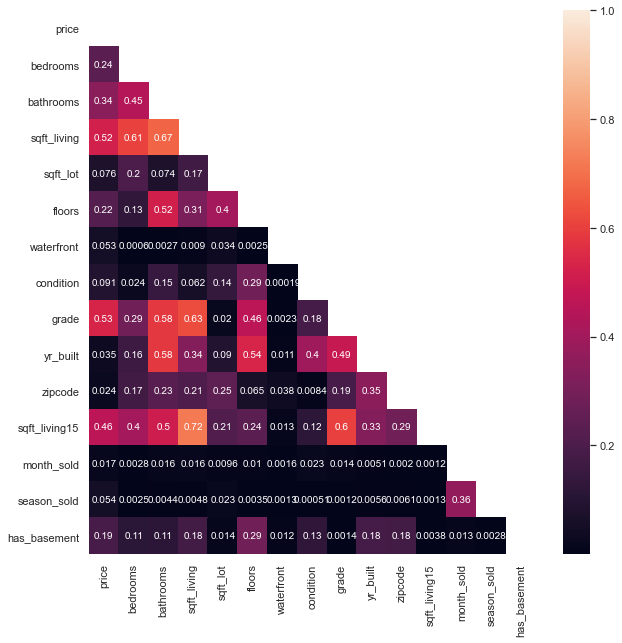

In [141]:
correlation_chart = multicol_plot(model4_df)

In [142]:
correlation_chart.style.background_gradient(cmap='Greens')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,sqft_living15,month_sold,season_sold,has_basement
price,1,0.237457,0.344668,0.522328,0.0762702,0.219839,0.0534532,0.0911319,0.533841,0.0347574,0.0243219,0.463089,0.0170441,0.0538934,0.187784
bedrooms,0.237457,1,0.447723,0.609147,0.20141,0.129827,0.00059643,0.0242901,0.291687,0.157966,0.174633,0.40471,0.00277392,0.00250179,0.112418
bathrooms,0.344668,0.447723,1,0.672121,0.0743924,0.516455,0.00273389,0.147599,0.582263,0.584608,0.229822,0.504027,0.0157355,0.0043617,0.113961
sqft_living,0.522328,0.609147,0.672121,1,0.170274,0.312153,0.00898365,0.0619846,0.628006,0.335867,0.206035,0.719121,0.0161347,0.00476474,0.178653
sqft_lot,0.0762702,0.20141,0.0743924,0.170274,1,0.404885,0.0338113,0.137842,0.0199451,0.0901306,0.246009,0.208027,0.00963821,0.0232313,0.0141077
floors,0.219839,0.129827,0.516455,0.312153,0.404885,1,0.00250271,0.290462,0.461687,0.536616,0.0645509,0.236684,0.0101662,0.0035428,0.288323
waterfront,0.0534532,0.00059643,0.00273389,0.00898365,0.0338113,0.00250271,1,0.000186098,0.00226152,0.0107234,0.037741,0.0125482,0.00161104,0.00129372,0.0118022
condition,0.0911319,0.0242901,0.147599,0.0619846,0.137842,0.290462,0.000186098,1,0.180226,0.395206,0.00838081,0.117543,0.0226444,0.000506311,0.128171
grade,0.533841,0.291687,0.582263,0.628006,0.0199451,0.461687,0.00226152,0.180226,1,0.489957,0.190158,0.602471,0.0139993,0.00122525,0.00139674
yr_built,0.0347574,0.157966,0.584608,0.335867,0.0901306,0.536616,0.0107234,0.395206,0.489957,1,0.349001,0.332488,0.00512269,0.00562866,0.180781


In [143]:
vif_columns = vif_results(model4_df)

const           4574448.737
bedrooms              1.694
bathrooms             2.936
sqft_living           3.978
sqft_lot              1.565
floors                2.446
waterfront            1.004
condition             1.256
grade                 2.229
yr_built              2.306
zipcode               1.344
sqft_living15         2.447
month_sold            1.155
season_sold           1.154
has_basement          1.441
dtype: float64


In [144]:
vif_columns

[]

# Model 4

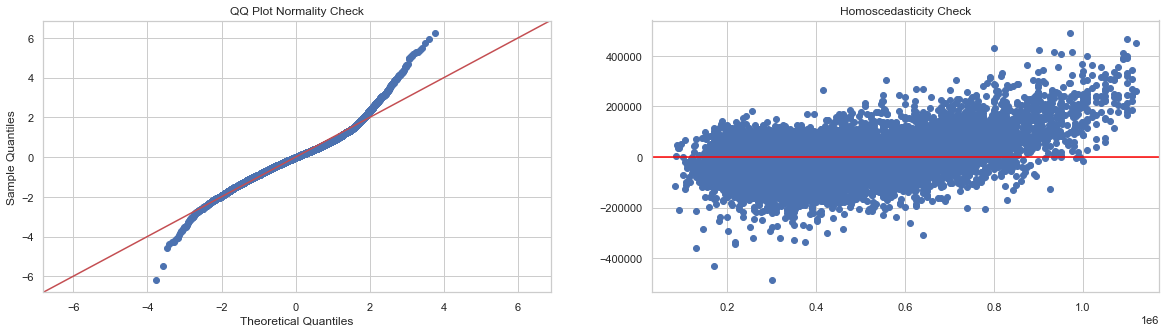

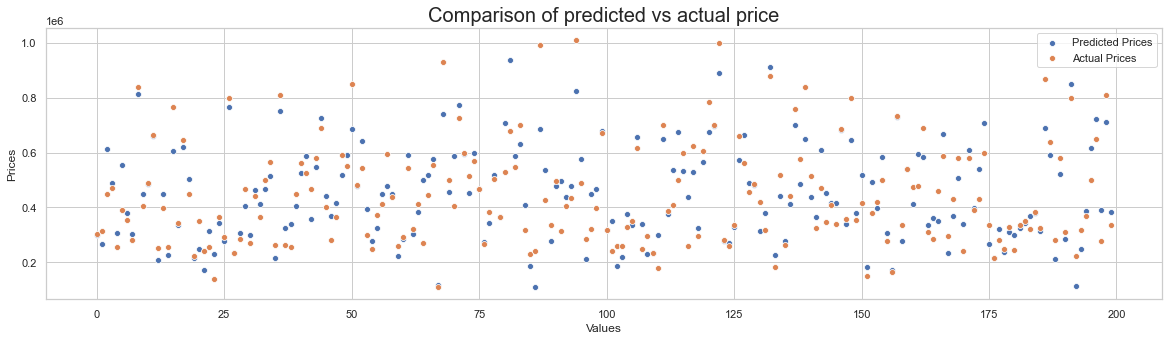

Model test R2 score: 0.8241771003268443
K-fold cross validation negative MSE: -16541600739.05885


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     596.1
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:50:57   Log-Likelihood:            -1.5343e+05
No. Observations:               12091   AIC:                         3.071e+05
Df Residuals:                   11996   BIC:                         3.078e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              5.35e+05   7.64e+04      7.005      0.000    3.85e+05    6.85e+05
C(waterfront)[T.1]    3.734e+05   2.66e+04     14.015      0.000    3.21e+05    4.26e+05
C(condition)[T.2]     1.234e+05   3.13e+04      3.948      0.000    6.22e+04    1.85e+05
C(condition)[T.3]     1.534e+05   2.99e+04      5.125      0.000    9.48e+04    2.12e+05
C(condition)[T.4]     1.736e+05   2.99e+04      5.800      0.000    1.15e+05    2.32e+05
C(condition)[T.5]     2.065e+05      3e+04      6.882      0.000    1.48e+05    2.65e+05
C(zipcode)[T.98002]   1.882e+04   8919.911      2.110      0.035    1336.252    3.63e+04
C(zipcode)[T.98003]   8528.7488   8171.451      1.044      0.297   -7488.617    2.45e+04
C(zipcode)[T.98004]   5.125e+05   9625.274     53.244      0.000    4.94e+05    5.31e+05
C(zipcode)[T.98005]   3.225e+05   1.08e+04     29.974      0.000    3.01e+05    3.44e+05
C(zipcode)[T.98006]   2.573e+05   7908.861     32.530      0.000    2.42e+05    2.73e+05
C(zipcode)[T.98007]   2.373e+05   1.02e+04     23.213      0.000    2.17e+05    2.57e+05
C(zipcode)[T.98008]    2.36e+05   8154.444     28.941      0.000     2.2e+05    2.52e+05
C(zipcode)[T.98010]   8.746e+04   1.71e+04      5.122      0.000     5.4e+04    1.21e+05
C(zipcode)[T.98011]   1.437e+05   9149.601     15.707      0.000    1.26e+05    1.62e+05
C(zipcode)[T.98014]   1.045e+05    1.6e+04      6.552      0.000    7.33e+04    1.36e+05
C(zipcode)[T.98019]   9.534e+04   9714.244      9.815      0.000    7.63e+04    1.14e+05
C(zipcode)[T.98022]    1.63e+04   9816.147      1.661      0.097   -2936.295    3.55e+04
C(zipcode)[T.98023]  -1.161e+04   7180.473     -1.616      0.106   -2.57e+04    2469.376
C(zipcode)[T.98024]   1.547e+05   2.26e+04      6.839      0.000     1.1e+05    1.99e+05
C(zipcode)[T.98027]   2.275e+05   8455.584     26.908      0.000    2.11e+05    2.44e+05
C(zipcode)[T.98028]   1.304e+05   8231.298     15.848      0.000    1.14e+05    1.47e+05
C(zipcode)[T.98029]   2.309e+05   7796.240     29.621      0.000    2.16e+05    2.46e+05
C(zipcode)[T.98030]   4204.8286   8155.802      0.516      0.606   -1.18e+04    2.02e+04
C(zipcode)[T.98031]    1.06e+04   8175.914      1.297      0.195   -5421.169    2.66e+04
C(zipcode)[T.98032]   2044.6049   1.05e+04      0.194      0.846   -1.86e+04    2.27e+04
C(zipcode)[T.98033]   3.094e+05   7664.517     40.373      0.000    2.94e+05    3.24e+05
C(zipcode)[T.98034]   1.895e+05   7011.100     27.023      0.000    1.76e+05    2.03e+05
C(zipcode)[T.98038]   3.784e+04   7037.667      5.376      0.000     2.4e+04    5.16e+04
C(zipcode)[T.98039]   6.319e+05   3.27e+04     19.312      0.000    5.68e+05    6.96e+05
C(zipcode)[T.98040]   4.181e+05   1.07e+04     39.183      0.000    3.97e+05    4.39e+05
C(zipcode)[T.98042]   1.086e+04   7131.851      1.523    

In [145]:
model4 = make_model(model4_df)

In [146]:
pvalues_compare['model4'] = model4.pvalues

In [147]:
pvalues_compare['change3'] = pvalues_compare['model4'] - pvalues_compare['model3']

In [148]:
pvalues_compare.T

,Intercept,C(waterfront)[T.1],C(condition)[T.2],C(condition)[T.3],C(condition)[T.4],C(condition)[T.5],C(zipcode)[T.98002],C(zipcode)[T.98003],C(zipcode)[T.98004],C(zipcode)[T.98005],C(zipcode)[T.98006],C(zipcode)[T.98007],C(zipcode)[T.98008],C(zipcode)[T.98010],C(zipcode)[T.98011],C(zipcode)[T.98014],C(zipcode)[T.98019],C(zipcode)[T.98022],C(zipcode)[T.98023],C(zipcode)[T.98024],C(zipcode)[T.98027],C(zipcode)[T.98028],C(zipcode)[T.98029],C(zipcode)[T.98030],C(zipcode)[T.98031],C(zipcode)[T.98032],C(zipcode)[T.98033],C(zipcode)[T.98034],C(zipcode)[T.98038],C(zipcode)[T.98039],C(zipcode)[T.98040],C(zipcode)[T.98042],C(zipcode)[T.98045],C(zipcode)[T.98052],C(zipcode)[T.98053],C(zipcode)[T.98055],C(zipcode)[T.98056],C(zipcode)[T.98058],C(zipcode)[T.98059],C(zipcode)[T.98065],...,C(zipcode)[T.98155],C(zipcode)[T.98166],C(zipcode)[T.98168],C(zipcode)[T.98177],C(zipcode)[T.98178],C(zipcode)[T.98188],C(zipcode)[T.98198],C(zipcode)[T.98199],C(month_sold)[T.2],C(month_sold)[T.3],C(month_sold)[T.4],C(month_sold)[T.5],C(month_sold)[T.6],C(month_sold)[T.7],C(month_sold)[T.8],C(month_sold)[T.9],C(month_sold)[T.10],C(month_sold)[T.11],C(month_sold)[T.12],C(week_sold)[T.2],C(week_sold)[T.3],C(week_sold)[T.4],C(week_sold)[T.5],C(season_sold)[T.2],C(season_sold)[T.3],C(season_sold)[T.4],C(was_renovated)[T.1],C(has_basement)[T.1],bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
model1,0.000,0.000,0.403,0.680,0.257,0.022,0.108,0.290,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.546,0.002,0.000,0.000,0.000,0.000,0.501,0.922,0.658,0.000,0.000,0.118,0.000,0.000,0.835,0.000,0.000,0.000,0.014,0.000,0.185,0.000,0.000,...,0.000,0.000,0.000,0.000,0.001,0.009,0.181,0.000,0.283,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.201,0.147,0.026,0.001,0.495,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.020,0.000,0.000,0.000,0.085
model2,0.000,0.000,0.000,0.000,0.000,0.000,0.043,0.261,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.136,0.096,0.000,0.000,0.000,0.000,0.688,0.173,0.793,0.000,0.000,0.000,0.000,0.000,0.169,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.011,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.725,0.694,0.624,0.079,0.441,0.000,0.000,0.000,nan,0.005,0.001,0.000,0.000,0.012,0.000,0.000,0.000,0.409,0.000,nan,0.000,0.148
change,0.000,0.000,-0.403,-0.680,-0.257,-0.022,-0.065,-0.029,0.000,-0.000,-0.000,-0.000,-0.000,-0.002,-0.000,-0.000,-0.000,-0.409,0.094,-0.000,-0.000,-0.000,-0.000,0.187,-0.749,0.134,-0.000,-0.000,-0.118,0.000,-0.000,-0.666,-0.000,-0.000,-0.000,-0.014,-0.000,-0.185,-0.000,-0.000,...,-0.000,-0.000,-0.000,-0.000,-0.001,-0.009,-0.181,-0.000,-0.271,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.524,0.548,0.597,0.078,-0.054,0.000,0.000,0.000,nan,0.005,0.001,0.000,-0.000,0.012,0.000,-0.000,0.000,0.389,-0.000,nan,-0.000,0.063
model3,0.000,0.000,0.000,0.000,0.000,0.000,0.045,0.260,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.134,0.100,0.000,0.000,0.000,0.000,0.693,0.179,0.793,0.000,0.000,0.000,0.000,0.000,0.178,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.011,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.795,nan,nan,nan,nan,0.000,0.000,0.000,nan,0.008,0.001,0.000,0.000,0.000,0.000,0.000,0.000,nan,0.000,nan,0.000,nan
change2,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.002,-0.001,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.003,0.004,-0.000,-0.000,-0.000,-0.000,0.005,0.006,0.001,0.000,-0.000,0.000,-0.000,0.000,0.008,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,...,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.070,nan,nan,nan,nan,0.000,0.000,0.000,nan,0.003,0.000,0.000,-0.000,-0.012,-0.000,-0.000,-0.000,nan,-0.000,nan,-0.000,nan
model4,0.000,0.000,0.000,0.000,0.00

In [149]:
model4_badfeatures = bad_pvalues(model4)

9 bad p-values to be reviewed:
C(zipcode)[T.98003]   0.297
C(zipcode)[T.98022]   0.097
C(zipcode)[T.98023]   0.106
C(zipcode)[T.98030]   0.606
C(zipcode)[T.98031]   0.195
C(zipcode)[T.98032]   0.846
C(zipcode)[T.98042]   0.128
C(month_sold)[T.12]   0.767
floors                0.100
dtype: float64


In [150]:
model5_df = model4_df.copy()
model5_df.drop(columns='floors', axis=1, inplace=True)

In [151]:
model5_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16122 entries, 7129300520 to 1523300157
Data columns (total 14 columns):
price            16122 non-null int64
bedrooms         16122 non-null int64
bathrooms        16122 non-null float64
sqft_living      16122 non-null int64
sqft_lot         16122 non-null int64
waterfront       16122 non-null category
condition        16122 non-null category
grade            16122 non-null int64
yr_built         16122 non-null int64
zipcode          16122 non-null category
sqft_living15    16122 non-null int64
month_sold       16122 non-null category
season_sold      16122 non-null category
has_basement     16122 non-null category
dtypes: category(6), float64(1), int64(7)
memory usage: 1.2 MB


# Model 5

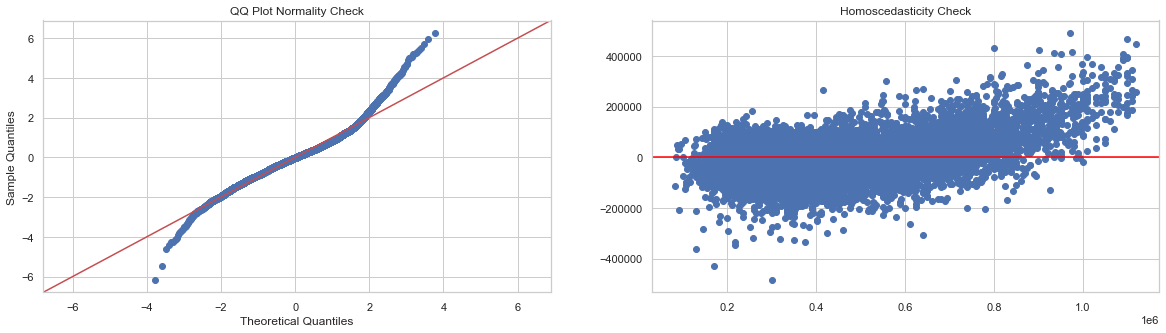

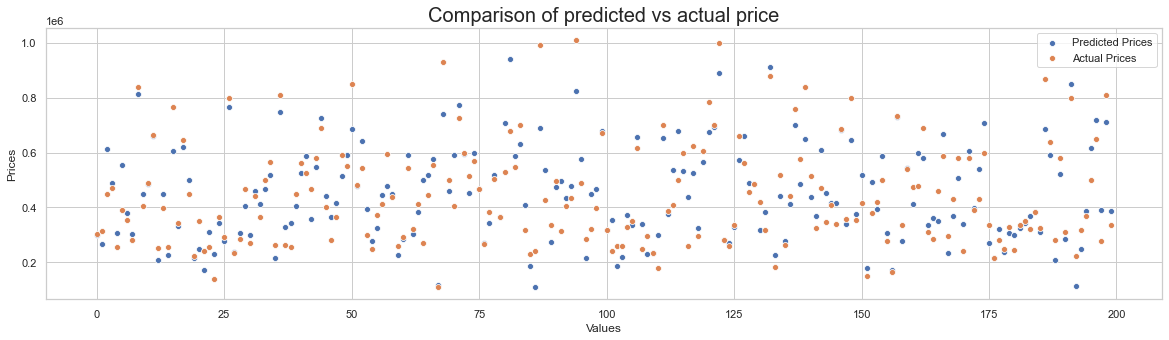

Model test R2 score: 0.824015359220664
K-fold cross validation negative MSE: -16690385200.62183


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     602.3
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:50:59   Log-Likelihood:            -1.5343e+05
No. Observations:               12091   AIC:                         3.071e+05
Df Residuals:                   11997   BIC:                         3.077e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.681e+05   7.37e+04      7.713      0.000    4.24e+05    7.13e+05
C(waterfront)[T.1]    3.724e+05   2.66e+04     13.981      0.000     3.2e+05    4.25e+05
C(condition)[T.2]     1.232e+05   3.13e+04      3.942      0.000     6.2e+04    1.85e+05
C(condition)[T.3]     1.533e+05   2.99e+04      5.121      0.000    9.46e+04    2.12e+05
C(condition)[T.4]     1.736e+05   2.99e+04      5.801      0.000    1.15e+05    2.32e+05
C(condition)[T.5]     2.065e+05      3e+04      6.883      0.000    1.48e+05    2.65e+05
C(zipcode)[T.98002]   1.883e+04   8920.546      2.110      0.035    1339.639    3.63e+04
C(zipcode)[T.98003]   8709.4375   8171.295      1.066      0.287   -7307.623    2.47e+04
C(zipcode)[T.98004]   5.121e+05   9623.401     53.217      0.000    4.93e+05    5.31e+05
C(zipcode)[T.98005]   3.228e+05   1.08e+04     30.003      0.000    3.02e+05    3.44e+05
C(zipcode)[T.98006]   2.572e+05   7909.263     32.518      0.000    2.42e+05    2.73e+05
C(zipcode)[T.98007]   2.373e+05   1.02e+04     23.215      0.000    2.17e+05    2.57e+05
C(zipcode)[T.98008]   2.365e+05   8150.267     29.012      0.000     2.2e+05    2.52e+05
C(zipcode)[T.98010]    8.74e+04   1.71e+04      5.119      0.000    5.39e+04    1.21e+05
C(zipcode)[T.98011]   1.438e+05   9150.088     15.716      0.000    1.26e+05    1.62e+05
C(zipcode)[T.98014]   1.042e+05    1.6e+04      6.534      0.000     7.3e+04    1.36e+05
C(zipcode)[T.98019]     9.5e+04   9712.751      9.781      0.000     7.6e+04    1.14e+05
C(zipcode)[T.98022]   1.653e+04   9815.854      1.684      0.092   -2706.065    3.58e+04
C(zipcode)[T.98023]  -1.137e+04   7179.538     -1.583      0.113   -2.54e+04    2704.687
C(zipcode)[T.98024]    1.54e+05   2.26e+04      6.809      0.000     1.1e+05    1.98e+05
C(zipcode)[T.98027]   2.269e+05   8449.057     26.861      0.000     2.1e+05    2.44e+05
C(zipcode)[T.98028]   1.305e+05   8231.878     15.849      0.000    1.14e+05    1.47e+05
C(zipcode)[T.98029]   2.307e+05   7795.628     29.595      0.000    2.15e+05    2.46e+05
C(zipcode)[T.98030]   4313.7329   8156.114      0.529      0.597   -1.17e+04    2.03e+04
C(zipcode)[T.98031]   1.071e+04   8176.263      1.309      0.190   -5320.142    2.67e+04
C(zipcode)[T.98032]   1904.9113   1.05e+04      0.181      0.856   -1.87e+04    2.25e+04
C(zipcode)[T.98033]   3.094e+05   7664.929     40.362      0.000    2.94e+05    3.24e+05
C(zipcode)[T.98034]   1.897e+05   7010.174     27.060      0.000    1.76e+05    2.03e+05
C(zipcode)[T.98038]   3.785e+04   7038.160      5.378      0.000    2.41e+04    5.16e+04
C(zipcode)[T.98039]   6.319e+05   3.27e+04     19.310      0.000    5.68e+05    6.96e+05
C(zipcode)[T.98040]   4.181e+05   1.07e+04     39.178      0.000    3.97e+05    4.39e+05
C(zipcode)[T.98042]   1.104e+04   7131.568      1.548    

In [152]:
model5 = make_model(model5_df)

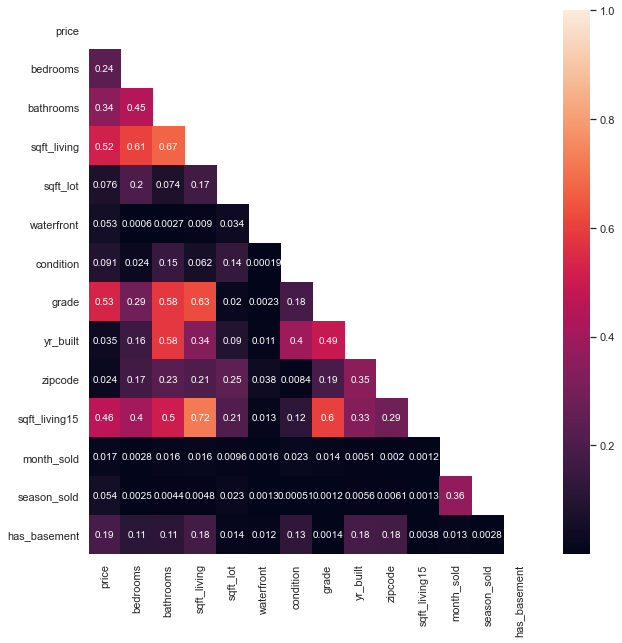

In [153]:
correlation_chart = multicol_plot(model5_df)

In [154]:
correlation_chart.style.background_gradient(cmap='Greens')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode,sqft_living15,month_sold,season_sold,has_basement
price,1,0.237457,0.344668,0.522328,0.0762702,0.0534532,0.0911319,0.533841,0.0347574,0.0243219,0.463089,0.0170441,0.0538934,0.187784
bedrooms,0.237457,1,0.447723,0.609147,0.20141,0.00059643,0.0242901,0.291687,0.157966,0.174633,0.40471,0.00277392,0.00250179,0.112418
bathrooms,0.344668,0.447723,1,0.672121,0.0743924,0.00273389,0.147599,0.582263,0.584608,0.229822,0.504027,0.0157355,0.0043617,0.113961
sqft_living,0.522328,0.609147,0.672121,1,0.170274,0.00898365,0.0619846,0.628006,0.335867,0.206035,0.719121,0.0161347,0.00476474,0.178653
sqft_lot,0.0762702,0.20141,0.0743924,0.170274,1,0.0338113,0.137842,0.0199451,0.0901306,0.246009,0.208027,0.00963821,0.0232313,0.0141077
waterfront,0.0534532,0.00059643,0.00273389,0.00898365,0.0338113,1,0.000186098,0.00226152,0.0107234,0.037741,0.0125482,0.00161104,0.00129372,0.0118022
condition,0.0911319,0.0242901,0.147599,0.0619846,0.137842,0.000186098,1,0.180226,0.395206,0.00838081,0.117543,0.0226444,0.000506311,0.128171
grade,0.533841,0.291687,0.582263,0.628006,0.0199451,0.00226152,0.180226,1,0.489957,0.190158,0.602471,0.0139993,0.00122525,0.00139674
yr_built,0.0347574,0.157966,0.584608,0.335867,0.0901306,0.0107234,0.395206,0.489957,1,0.349001,0.332488,0.00512269,0.00562866,0.180781
zipcode,0.0243219,0.174633,0.229822,0.206035,0.246009,0.037741,0.00838081,0.190158,0.349001,1,0.288836,0.00199331,0.00610375,0.17709


In [155]:
vif_columns = vif_results(model5_df)

const           4525883.134
bedrooms              1.693
bathrooms             2.758
sqft_living           3.913
sqft_lot              1.261
waterfront            1.004
condition             1.248
grade                 2.167
yr_built              2.220
zipcode               1.331
sqft_living15         2.431
month_sold            1.155
season_sold           1.154
has_basement          1.186
dtype: float64


In [156]:
model6_df = model5_df.copy()
model6_df.drop(columns='sqft_living15', axis=1, inplace=True)

# Model 6

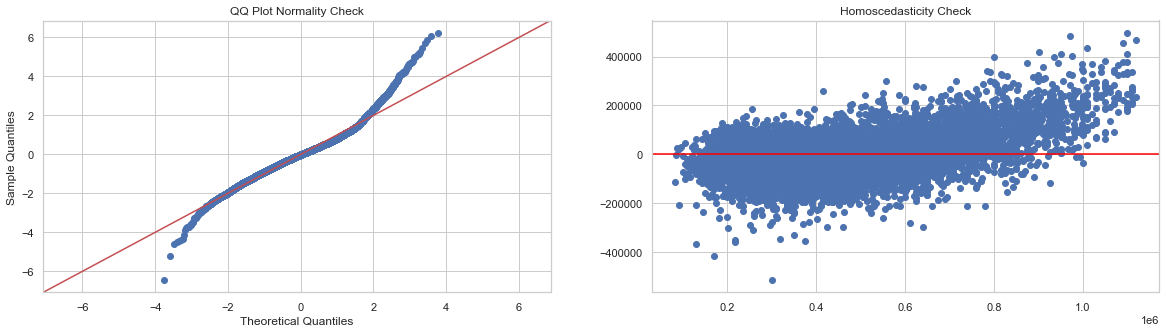

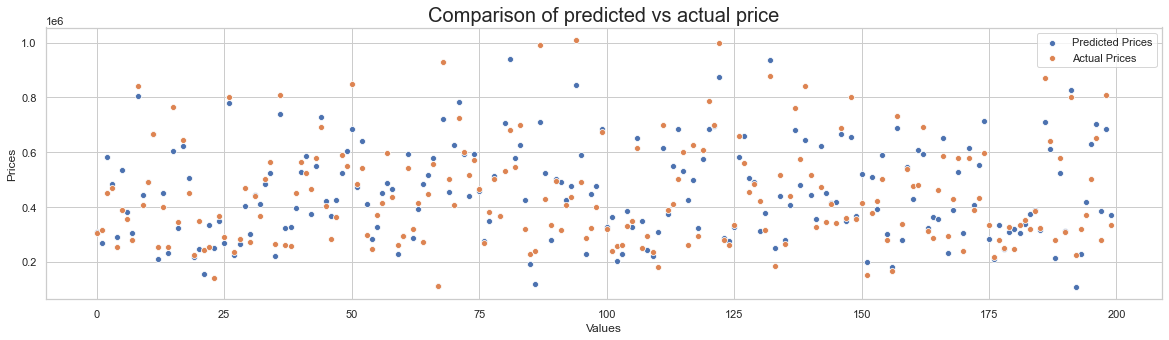

Model test R2 score: 0.8195002446998766
K-fold cross validation negative MSE: -17084118992.309866


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     586.4
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:51:02   Log-Likelihood:            -1.5362e+05
No. Observations:               12091   AIC:                         3.074e+05
Df Residuals:                   11998   BIC:                         3.081e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             6.916e+05   7.45e+04      9.279      0.000    5.45e+05    8.38e+05
C(waterfront)[T.1]    3.855e+05    2.7e+04     14.255      0.000    3.32e+05    4.38e+05
C(condition)[T.2]     1.161e+05   3.17e+04      3.656      0.000    5.38e+04    1.78e+05
C(condition)[T.3]     1.469e+05   3.04e+04      4.833      0.000    8.73e+04    2.07e+05
C(condition)[T.4]     1.649e+05   3.04e+04      5.424      0.000    1.05e+05    2.24e+05
C(condition)[T.5]     1.952e+05   3.05e+04      6.408      0.000    1.35e+05    2.55e+05
C(zipcode)[T.98002]   1.252e+04   9053.311      1.383      0.167   -5226.444    3.03e+04
C(zipcode)[T.98003]   7929.7700   8298.308      0.956      0.339   -8336.255    2.42e+04
C(zipcode)[T.98004]   5.266e+05   9743.760     54.045      0.000    5.07e+05    5.46e+05
C(zipcode)[T.98005]   3.309e+05   1.09e+04     30.310      0.000    3.09e+05    3.52e+05
C(zipcode)[T.98006]   2.668e+05   8016.680     33.276      0.000    2.51e+05    2.82e+05
C(zipcode)[T.98007]   2.399e+05   1.04e+04     23.112      0.000     2.2e+05     2.6e+05
C(zipcode)[T.98008]   2.386e+05   8276.289     28.830      0.000    2.22e+05    2.55e+05
C(zipcode)[T.98010]   8.299e+04   1.73e+04      4.787      0.000     4.9e+04    1.17e+05
C(zipcode)[T.98011]   1.497e+05   9287.279     16.121      0.000    1.32e+05    1.68e+05
C(zipcode)[T.98014]   9.384e+04   1.62e+04      5.795      0.000    6.21e+04    1.26e+05
C(zipcode)[T.98019]    1.03e+05   9855.039     10.449      0.000    8.37e+04    1.22e+05
C(zipcode)[T.98022]   1.471e+04   9968.094      1.476      0.140   -4825.328    3.43e+04
C(zipcode)[T.98023]  -1.056e+04   7291.099     -1.448      0.148   -2.48e+04    3735.146
C(zipcode)[T.98024]   1.406e+05    2.3e+04      6.125      0.000    9.56e+04    1.86e+05
C(zipcode)[T.98027]   2.311e+05   8577.763     26.940      0.000    2.14e+05    2.48e+05
C(zipcode)[T.98028]   1.358e+05   8355.254     16.255      0.000    1.19e+05    1.52e+05
C(zipcode)[T.98029]   2.324e+05   7916.404     29.357      0.000    2.17e+05    2.48e+05
C(zipcode)[T.98030]   6406.8625   8282.268      0.774      0.439   -9827.722    2.26e+04
C(zipcode)[T.98031]   1.261e+04   8302.855      1.519      0.129   -3662.125    2.89e+04
C(zipcode)[T.98032]   -914.9817   1.07e+04     -0.086      0.932   -2.18e+04       2e+04
C(zipcode)[T.98033]   3.148e+05   7779.066     40.462      0.000       3e+05     3.3e+05
C(zipcode)[T.98034]   1.889e+05   7119.112     26.539      0.000    1.75e+05    2.03e+05
C(zipcode)[T.98038]   4.402e+04   7140.360      6.165      0.000       3e+04     5.8e+04
C(zipcode)[T.98039]   6.517e+05   3.32e+04     19.620      0.000    5.87e+05    7.17e+05
C(zipcode)[T.98040]    4.35e+05   1.08e+04     40.272      0.000    4.14e+05    4.56e+05
C(zipcode)[T.98042]   1.503e+04   7239.499      2.076    

In [157]:
model6 = make_model(model6_df)

In [158]:
model6_badfeatures = bad_pvalues(model6)

8 bad p-values to be reviewed:
C(zipcode)[T.98002]   0.167
C(zipcode)[T.98003]   0.339
C(zipcode)[T.98022]   0.140
C(zipcode)[T.98023]   0.148
C(zipcode)[T.98030]   0.439
C(zipcode)[T.98031]   0.129
C(zipcode)[T.98032]   0.932
C(month_sold)[T.12]   0.625
dtype: float64


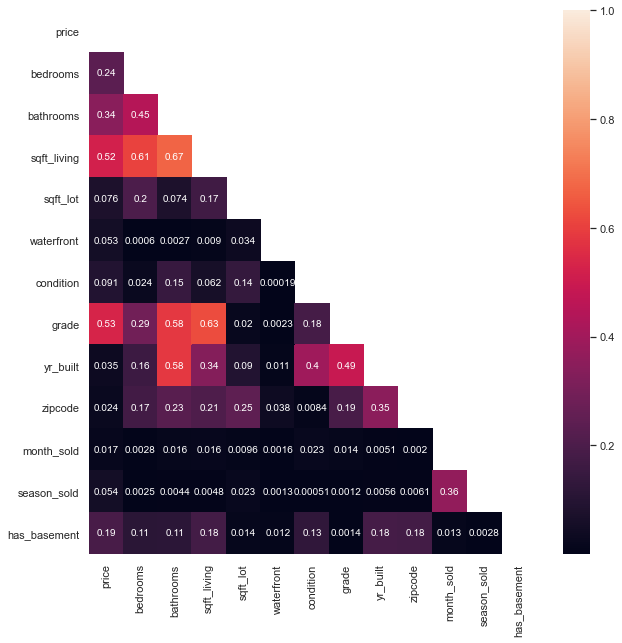

In [159]:
correlation_chart6 = multicol_plot(model6_df)

In [160]:
vif_columns6 = vif_results(model6_df)

const          4433280.979
bedrooms             1.690
bathrooms            2.758
sqft_living          3.114
sqft_lot             1.237
waterfront           1.004
condition            1.241
grade                2.023
yr_built             2.218
zipcode              1.304
month_sold           1.155
season_sold          1.154
has_basement         1.173
dtype: float64


# Scrub 3

In [161]:
model7_df = model6_df.copy()
model7_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode,month_sold,season_sold,has_basement
id,,,,,,,,,,,,,
7129300520,221900,3,1.000,1180,5650,0,3,7,1955,98178,10,3,0
5631500400,180000,2,1.000,770,10000,0,3,6,1933,98028,2,4,0
2487200875,604000,4,3.000,1960,5000,0,5,7,1965,98136,12,4,1
1954400510,510000,3,2.000,1680,8080,0,3,8,1987,98074,2,4,0
1321400060,257500,3,2.250,1715,6819,0,3,7,1995,98003,6,2,0


In [162]:
model7_df['price'] = model7_df['price'].map(lambda x: np.log(x))

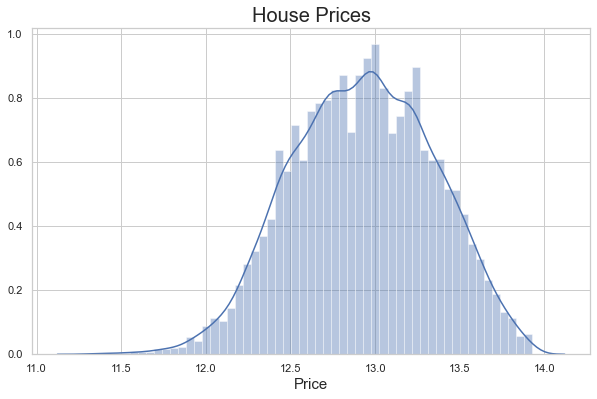

In [163]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(model7_df['price'], bins='auto')

ax.set_xlabel('Price', fontsize=15)
ax.set_title('House Prices', fontsize=20);

# Model 7

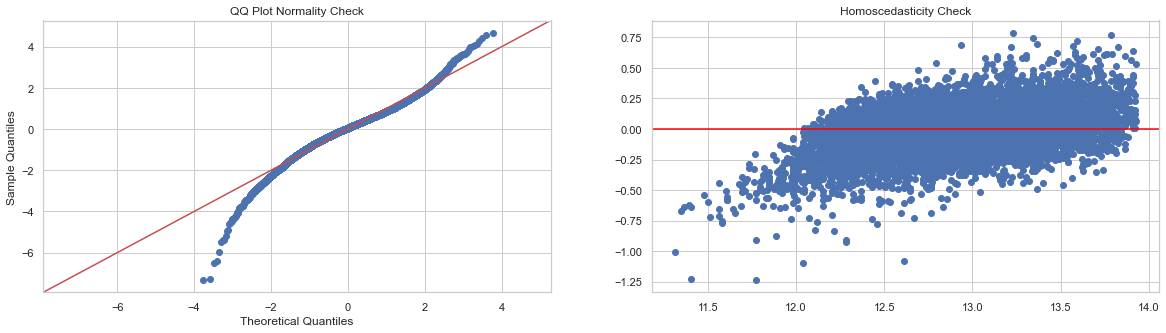

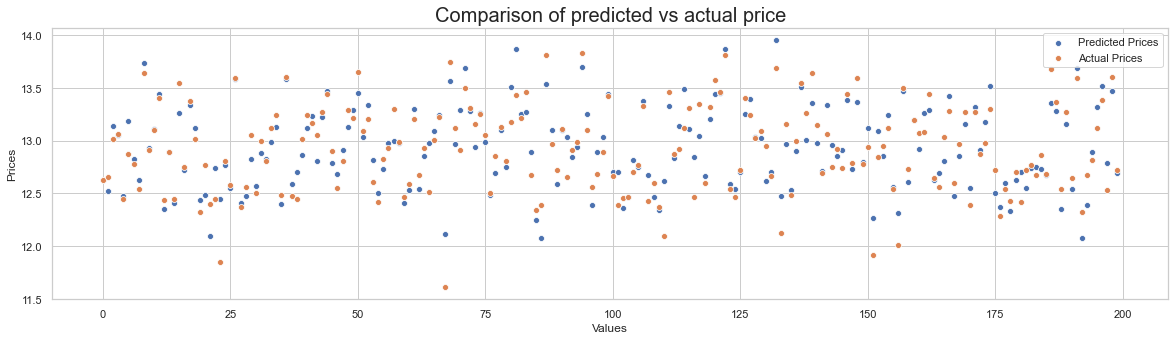

Model test R2 score: 0.8374271270114173
K-fold cross validation negative MSE: -0.08765432226301553


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     668.8
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:51:05   Log-Likelihood:                 4355.6
No. Observations:               12091   AIC:                            -8525.
Df Residuals:                   11998   BIC:                            -7837.
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               11.1001      0.158     70.352      0.000      10.791      11.409
C(waterfront)[T.1]       0.7607      0.057     13.289      0.000       0.649       0.873
C(condition)[T.2]        0.1666      0.067      2.479      0.013       0.035       0.298
C(condition)[T.3]        0.3005      0.064      4.669      0.000       0.174       0.427
C(condition)[T.4]        0.3387      0.064      5.263      0.000       0.213       0.465
C(condition)[T.5]        0.3882      0.064      6.018      0.000       0.262       0.515
C(zipcode)[T.98002]     -0.0187      0.019     -0.977      0.329      -0.056       0.019
C(zipcode)[T.98003]      0.0189      0.018      1.074      0.283      -0.016       0.053
C(zipcode)[T.98004]      1.0744      0.021     52.085      0.000       1.034       1.115
C(zipcode)[T.98005]      0.7583      0.023     32.811      0.000       0.713       0.804
C(zipcode)[T.98006]      0.6349      0.017     37.410      0.000       0.602       0.668
C(zipcode)[T.98007]      0.6342      0.022     28.861      0.000       0.591       0.677
C(zipcode)[T.98008]      0.6368      0.018     36.344      0.000       0.602       0.671
C(zipcode)[T.98010]      0.1685      0.037      4.591      0.000       0.097       0.240
C(zipcode)[T.98011]      0.4559      0.020     23.189      0.000       0.417       0.494
C(zipcode)[T.98014]      0.2651      0.034      7.735      0.000       0.198       0.332
C(zipcode)[T.98019]      0.3360      0.021     16.105      0.000       0.295       0.377
C(zipcode)[T.98022]      0.0379      0.021      1.795      0.073      -0.003       0.079
C(zipcode)[T.98023]     -0.0284      0.015     -1.839      0.066      -0.059       0.002
C(zipcode)[T.98024]      0.4027      0.049      8.288      0.000       0.307       0.498
C(zipcode)[T.98027]      0.5994      0.018     33.007      0.000       0.564       0.635
C(zipcode)[T.98028]      0.4145      0.018     23.434      0.000       0.380       0.449
C(zipcode)[T.98029]      0.6091      0.017     36.343      0.000       0.576       0.642
C(zipcode)[T.98030]      0.0455      0.018      2.597      0.009       0.011       0.080
C(zipcode)[T.98031]      0.0698      0.018      3.970      0.000       0.035       0.104
C(zipcode)[T.98032]     -0.0360      0.023     -1.594      0.111      -0.080       0.008
C(zipcode)[T.98033]      0.7459      0.016     45.294      0.000       0.714       0.778
C(zipcode)[T.98034]      0.5284      0.015     35.062      0.000       0.499       0.558
C(zipcode)[T.98038]      0.1642      0.015     10.864      0.000       0.135       0.194
C(zipcode)[T.98039]      1.2919      0.070     18.372      0.000       1.154       1.430
C(zipcode)[T.98040]      0.8970      0.023     39.228      0.000       0.852       0.942
C(zipcode)[T.98042]      0.0464      0.015      3.025    

In [164]:
model7 = make_model(model7_df)

In [193]:
import statsmodels.stats.api as sms
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model7.resid, model7.model.exog)
list(zip(name, test))

[('Lagrange multiplier statistic', 953.6312231691232),
 ('p-value', 8.588136906573856e-142),
 ('f-value', 11.166546844358884),
 ('f p-value', 2.3413819499490542e-150)]

In [194]:
from scipy import stats
stats.normaltest(model7.resid)

NormaltestResult(statistic=1121.6393755976358, pvalue=2.7485538255312466e-244)

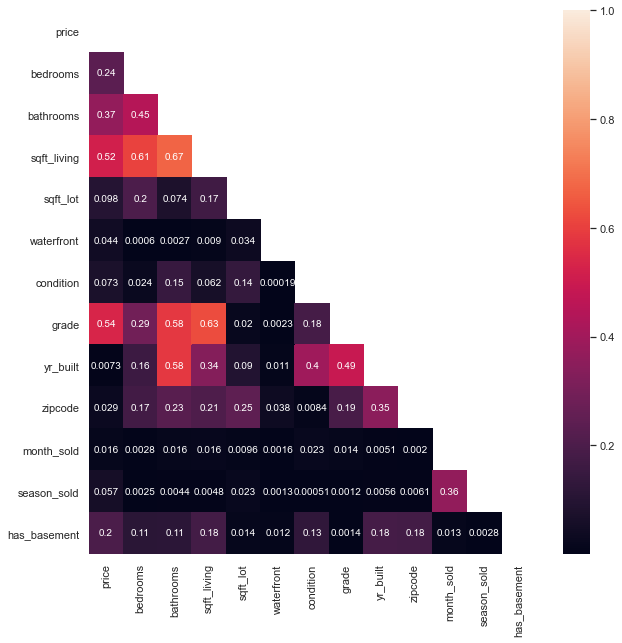

In [165]:
correlation_chart = multicol_plot(model7_df)

In [166]:
vif_columns = vif_results(model7_df)

const          4433280.979
bedrooms             1.690
bathrooms            2.758
sqft_living          3.114
sqft_lot             1.237
waterfront           1.004
condition            1.241
grade                2.023
yr_built             2.218
zipcode              1.304
month_sold           1.155
season_sold          1.154
has_basement         1.173
dtype: float64


In [167]:
model7_badfeatures = bad_pvalues(model7)

7 bad p-values to be reviewed:
C(zipcode)[T.98002]   0.329
C(zipcode)[T.98003]   0.283
C(zipcode)[T.98022]   0.073
C(zipcode)[T.98023]   0.066
C(zipcode)[T.98032]   0.111
C(zipcode)[T.98092]   0.559
C(month_sold)[T.12]   0.740
dtype: float64


In [168]:
num_cols3 = model7_df.select_dtypes('number').columns
num_cols3

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade',
       'yr_built'],
      dtype='object')

In [202]:
model7_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16122 entries, 7129300520 to 1523300157
Data columns (total 13 columns):
price           16122 non-null float64
bedrooms        16122 non-null int64
bathrooms       16122 non-null float64
sqft_living     16122 non-null int64
sqft_lot        16122 non-null int64
waterfront      16122 non-null category
condition       16122 non-null category
grade           16122 non-null int64
yr_built        16122 non-null int64
zipcode         16122 non-null category
month_sold      16122 non-null category
season_sold     16122 non-null category
has_basement    16122 non-null category
dtypes: category(6), float64(2), int64(5)
memory usage: 1.1 MB


# Explore 3

In [169]:
@interact
def explore_plot(col=num_cols3):
#     for col in num_cols:
    test_plot(model7_df, col)

interactive(children=(Dropdown(description='col', options=('price', 'bedrooms', 'bathrooms', 'sqft_living', 's…

# Model 8 

In [170]:
model8_df = model7_df.copy()

In [171]:
model8_df.drop(columns=('yr_built'), inplace=True)

In [172]:
model8_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16122 entries, 7129300520 to 1523300157
Data columns (total 12 columns):
price           16122 non-null float64
bedrooms        16122 non-null int64
bathrooms       16122 non-null float64
sqft_living     16122 non-null int64
sqft_lot        16122 non-null int64
waterfront      16122 non-null category
condition       16122 non-null category
grade           16122 non-null int64
zipcode         16122 non-null category
month_sold      16122 non-null category
season_sold     16122 non-null category
has_basement    16122 non-null category
dtypes: category(6), float64(2), int64(4)
memory usage: 980.2 KB


## Results

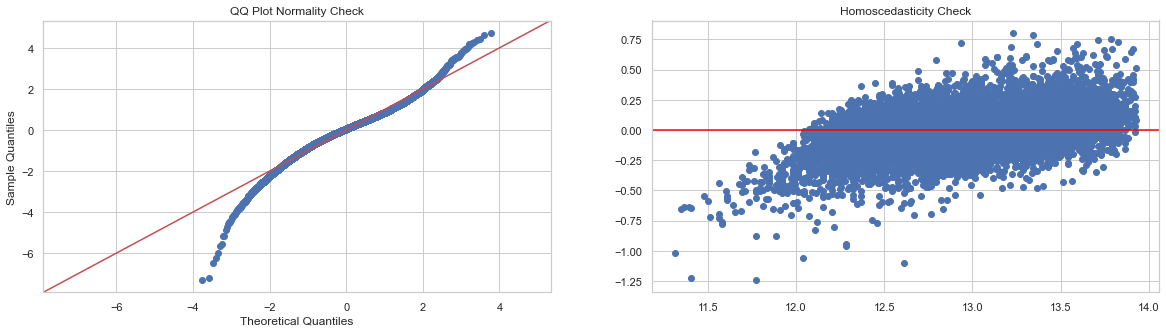

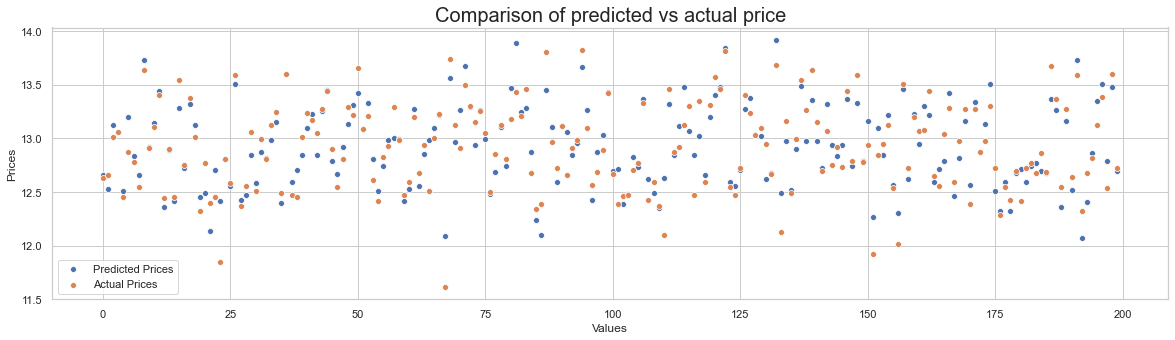

Model test R2 score: 0.8354245731911955
K-fold cross validation negative MSE: -0.09928723730602868


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     665.2
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:51:09   Log-Likelihood:                 4273.1
No. Observations:               12091   AIC:                            -8362.
Df Residuals:                   11999   BIC:                            -7681.
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.2128      0.058    159.857      0.000       9.100       9.326
C(waterfront)[T.1]       0.7638      0.058     13.252      0.000       0.651       0.877
C(condition)[T.2]        0.1565      0.068      2.312      0.021       0.024       0.289
C(condition)[T.3]        0.2757      0.065      4.256      0.000       0.149       0.403
C(condition)[T.4]        0.3271      0.065      5.049      0.000       0.200       0.454
C(condition)[T.5]        0.3872      0.065      5.963      0.000       0.260       0.514
C(zipcode)[T.98002]     -0.0128      0.019     -0.664      0.506      -0.051       0.025
C(zipcode)[T.98003]      0.0282      0.018      1.595      0.111      -0.006       0.063
C(zipcode)[T.98004]      1.0927      0.021     52.742      0.000       1.052       1.133
C(zipcode)[T.98005]      0.7750      0.023     33.363      0.000       0.729       0.821
C(zipcode)[T.98006]      0.6456      0.017     37.828      0.000       0.612       0.679
C(zipcode)[T.98007]      0.6504      0.022     29.446      0.000       0.607       0.694
C(zipcode)[T.98008]      0.6538      0.018     37.170      0.000       0.619       0.688
C(zipcode)[T.98010]      0.1506      0.037      4.079      0.000       0.078       0.223
C(zipcode)[T.98011]      0.4653      0.020     23.520      0.000       0.426       0.504
C(zipcode)[T.98014]      0.2548      0.035      7.385      0.000       0.187       0.322
C(zipcode)[T.98019]      0.3325      0.021     15.831      0.000       0.291       0.374
C(zipcode)[T.98022]      0.0383      0.021      1.805      0.071      -0.003       0.080
C(zipcode)[T.98023]     -0.0225      0.016     -1.450      0.147      -0.053       0.008
C(zipcode)[T.98024]      0.4170      0.049      8.526      0.000       0.321       0.513
C(zipcode)[T.98027]      0.6088      0.018     33.326      0.000       0.573       0.645
C(zipcode)[T.98028]      0.4232      0.018     23.780      0.000       0.388       0.458
C(zipcode)[T.98029]      0.6220      0.017     36.928      0.000       0.589       0.655
C(zipcode)[T.98030]      0.0489      0.018      2.768      0.006       0.014       0.083
C(zipcode)[T.98031]      0.0731      0.018      4.134      0.000       0.038       0.108
C(zipcode)[T.98032]     -0.0269      0.023     -1.184      0.236      -0.072       0.018
C(zipcode)[T.98033]      0.7563      0.017     45.667      0.000       0.724       0.789
C(zipcode)[T.98034]      0.5385      0.015     35.534      0.000       0.509       0.568
C(zipcode)[T.98038]      0.1619      0.015     10.640      0.000       0.132       0.192
C(zipcode)[T.98039]      1.3047      0.071     18.430      0.000       1.166       1.443
C(zipcode)[T.98040]      0.9160      0.023     39.876      0.000       0.871       0.961
C(zipcode)[T.98042]      0.0422      0.015      2.737    

In [173]:
model8 = make_model(model8_df)

In [174]:
model8_badfeatures = bad_pvalues(model8)

8 bad p-values to be reviewed:
C(zipcode)[T.98002]   0.506
C(zipcode)[T.98003]   0.111
C(zipcode)[T.98022]   0.071
C(zipcode)[T.98023]   0.147
C(zipcode)[T.98032]   0.236
C(zipcode)[T.98092]   0.599
C(month_sold)[T.12]   0.700
bedrooms              0.106
dtype: float64


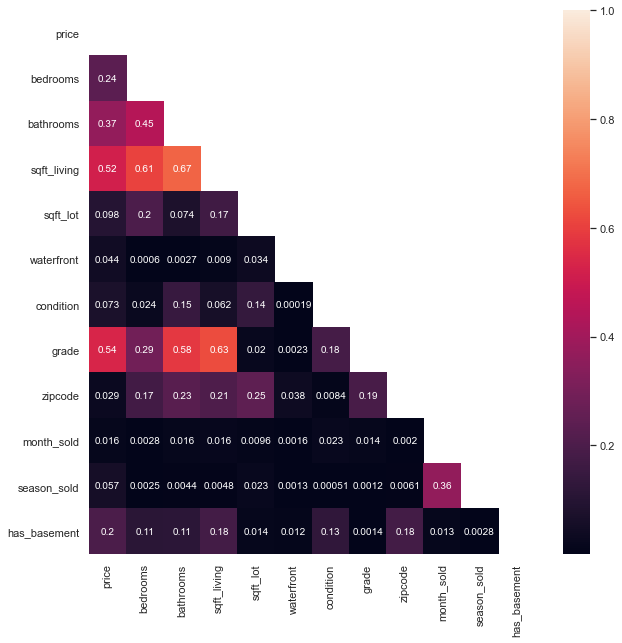

In [175]:
correlation_chart = multicol_plot(model8_df)

In [176]:
vif_columns = vif_results(model8_df)

const          3979210.429
bedrooms             1.682
bathrooms            2.206
sqft_living          3.082
sqft_lot             1.235
waterfront           1.004
condition            1.083
grade                1.931
zipcode              1.203
month_sold           1.155
season_sold          1.154
has_basement         1.131
dtype: float64


In [177]:
model9_df = model8_df.copy()

In [178]:
model9_df.drop(columns=('bedrooms'), inplace=True)

In [179]:
model9_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16122 entries, 7129300520 to 1523300157
Data columns (total 11 columns):
price           16122 non-null float64
bathrooms       16122 non-null float64
sqft_living     16122 non-null int64
sqft_lot        16122 non-null int64
waterfront      16122 non-null category
condition       16122 non-null category
grade           16122 non-null int64
zipcode         16122 non-null category
month_sold      16122 non-null category
season_sold     16122 non-null category
has_basement    16122 non-null category
dtypes: category(6), float64(2), int64(3)
memory usage: 854.2 KB


# Model 9

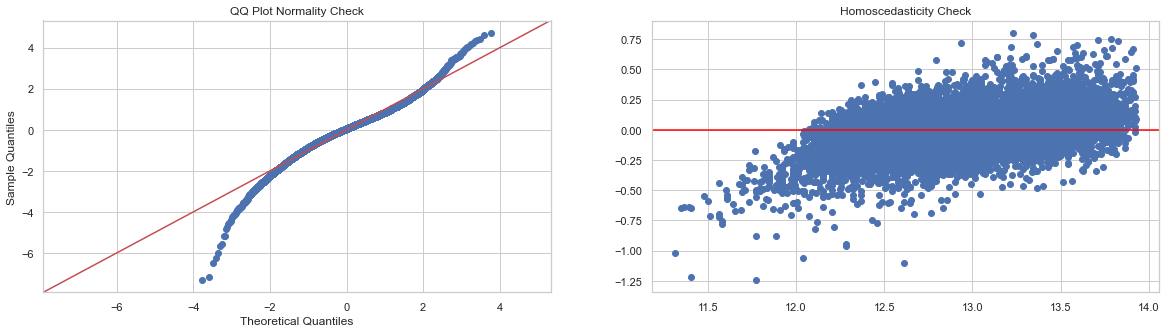

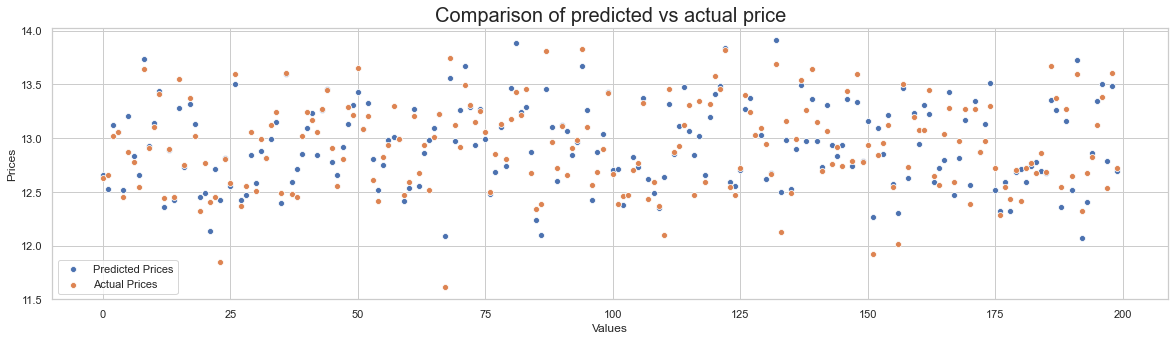

Model test R2 score: 0.8353820564253381
K-fold cross validation negative MSE: -0.09953077258819412


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     672.5
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:51:11   Log-Likelihood:                 4271.8
No. Observations:               12091   AIC:                            -8362.
Df Residuals:                   12000   BIC:                            -7688.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.2030      0.057    160.565      0.000       9.091       9.315
C(waterfront)[T.1]       0.7636      0.058     13.248      0.000       0.651       0.877
C(condition)[T.2]        0.1565      0.068      2.313      0.021       0.024       0.289
C(condition)[T.3]        0.2758      0.065      4.257      0.000       0.149       0.403
C(condition)[T.4]        0.3270      0.065      5.047      0.000       0.200       0.454
C(condition)[T.5]        0.3868      0.065      5.957      0.000       0.260       0.514
C(zipcode)[T.98002]     -0.0127      0.019     -0.660      0.509      -0.051       0.025
C(zipcode)[T.98003]      0.0285      0.018      1.612      0.107      -0.006       0.063
C(zipcode)[T.98004]      1.0931      0.021     52.762      0.000       1.053       1.134
C(zipcode)[T.98005]      0.7758      0.023     33.398      0.000       0.730       0.821
C(zipcode)[T.98006]      0.6459      0.017     37.846      0.000       0.612       0.679
C(zipcode)[T.98007]      0.6497      0.022     29.417      0.000       0.606       0.693
C(zipcode)[T.98008]      0.6532      0.018     37.141      0.000       0.619       0.688
C(zipcode)[T.98010]      0.1515      0.037      4.102      0.000       0.079       0.224
C(zipcode)[T.98011]      0.4659      0.020     23.555      0.000       0.427       0.505
C(zipcode)[T.98014]      0.2559      0.034      7.418      0.000       0.188       0.324
C(zipcode)[T.98019]      0.3334      0.021     15.878      0.000       0.292       0.375
C(zipcode)[T.98022]      0.0389      0.021      1.831      0.067      -0.003       0.081
C(zipcode)[T.98023]     -0.0224      0.016     -1.440      0.150      -0.053       0.008
C(zipcode)[T.98024]      0.4171      0.049      8.529      0.000       0.321       0.513
C(zipcode)[T.98027]      0.6096      0.018     33.383      0.000       0.574       0.645
C(zipcode)[T.98028]      0.4238      0.018     23.820      0.000       0.389       0.459
C(zipcode)[T.98029]      0.6229      0.017     36.997      0.000       0.590       0.656
C(zipcode)[T.98030]      0.0492      0.018      2.785      0.005       0.015       0.084
C(zipcode)[T.98031]      0.0732      0.018      4.139      0.000       0.039       0.108
C(zipcode)[T.98032]     -0.0272      0.023     -1.197      0.231      -0.072       0.017
C(zipcode)[T.98033]      0.7570      0.017     45.728      0.000       0.725       0.789
C(zipcode)[T.98034]      0.5386      0.015     35.540      0.000       0.509       0.568
C(zipcode)[T.98038]      0.1626      0.015     10.692      0.000       0.133       0.192
C(zipcode)[T.98039]      1.3045      0.071     18.426      0.000       1.166       1.443
C(zipcode)[T.98040]      0.9160      0.023     39.874      0.000       0.871       0.961
C(zipcode)[T.98042]      0.0427      0.015      2.766    

In [180]:
model9 = make_model(model9_df)

In [181]:
model9_badfeatures = bad_pvalues(model9)

7 bad p-values to be reviewed:
C(zipcode)[T.98002]   0.509
C(zipcode)[T.98003]   0.107
C(zipcode)[T.98022]   0.067
C(zipcode)[T.98023]   0.150
C(zipcode)[T.98032]   0.231
C(zipcode)[T.98092]   0.606
C(month_sold)[T.12]   0.692
dtype: float64


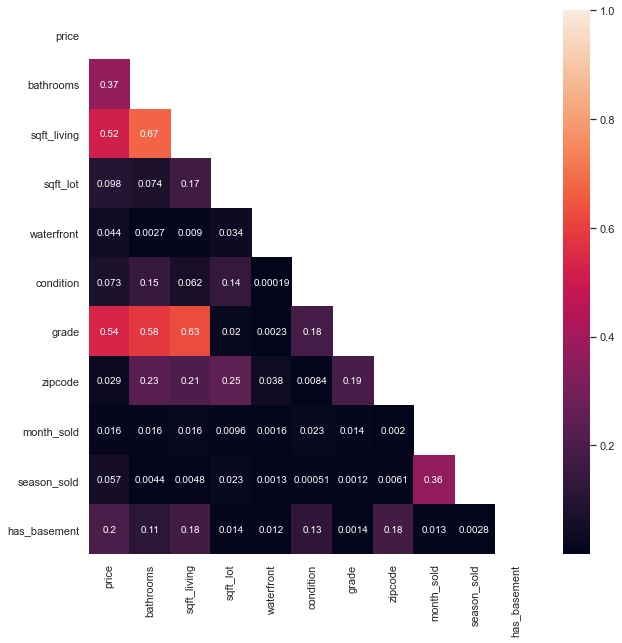

In [182]:
correlation_chart = multicol_plot(model9_df)

In [183]:
vif_columns = vif_results(model9_df)

const          3976009.561
bathrooms            2.165
sqft_living          2.493
sqft_lot             1.218
waterfront           1.004
condition            1.080
grade                1.885
zipcode              1.202
month_sold           1.155
season_sold          1.154
has_basement         1.131
dtype: float64


In [184]:
for col in num_cols3:
    model8_df[col] = model8_df[col].map(lambda x: np.log(x))

KeyError: 'yr_built'

In [ ]:
model8 = make_model(model8_df)

In [ ]:
correlation_chart8 = multicol_plot(model8_df)

In [ ]:
multicol_plot(model6_df)

In [ ]:
vif_columns8 = vif_results(model8_df)

In [ ]:
vif_results(model6_df)

In [ ]:
@interact
def explore_plot(col=num_cols2):
#     for col in num_cols:
    test_plot(model8_df, col)

# Scrub

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(model9_df)

In [ ]:
model9_df = model6_df.copy()

In [ ]:
model9_df['price'] = transformer.transform(model9_df, 'price')

In [ ]:
model9_df.price.value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(model9_df['price'], bins='auto')

ax.set_xlabel('Price', fontsize=15)
ax.set_title('House Prices', fontsize=20);

In [ ]:
model9 = make_model(model9_df)